## EXP_2467_seq_prune_04_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [7 4 2 6]
7
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 4s - loss: 0.0352 - accuracy: 0.9871 - val_loss: 0.0544 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0269 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 4.3750e-05 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.0257e-05 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 3.9389e-06 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9953


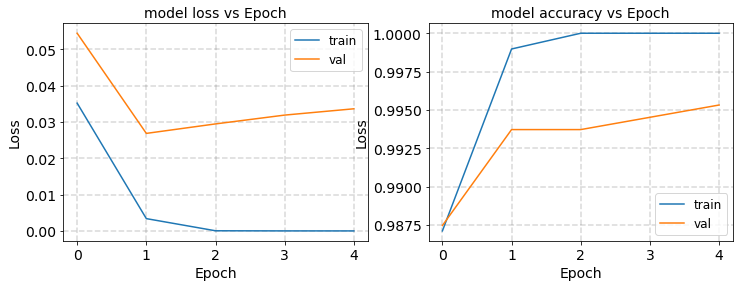

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0584 - accuracy: 0.9874 - val_loss: 0.0385 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0373 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0576 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 5.3879e-04 - accuracy: 0.9998 - val_loss: 0.0678 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.8035e-05 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9930


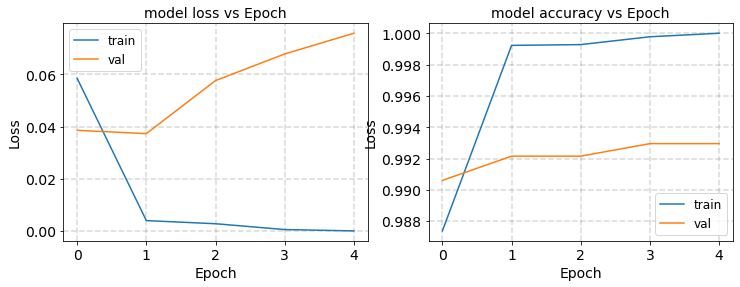

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0896 - accuracy: 0.9754 - val_loss: 0.0600 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 3s - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0476 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 7.0097e-04 - accuracy: 0.9999 - val_loss: 0.0736 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 4.5816e-05 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 1.1836e-05 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9890


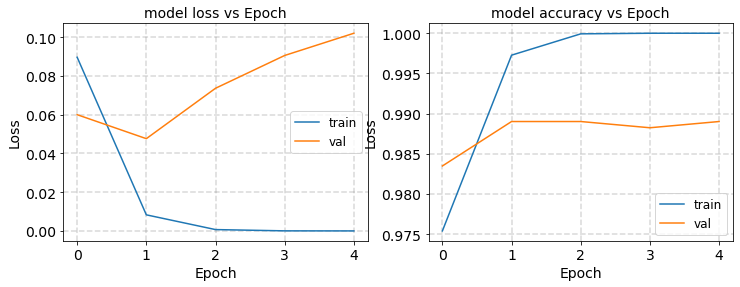

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0803 - accuracy: 0.9869 - val_loss: 0.0381 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0448 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 6.8934e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 1.4813e-05 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 5.8037e-06 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9913


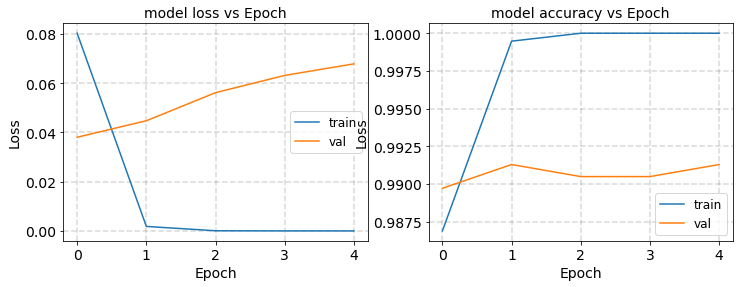

round1 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0754 - accuracy: 0.9896 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0307 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 1.0071e-04 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 2.5604e-05 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 7.2983e-06 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9937


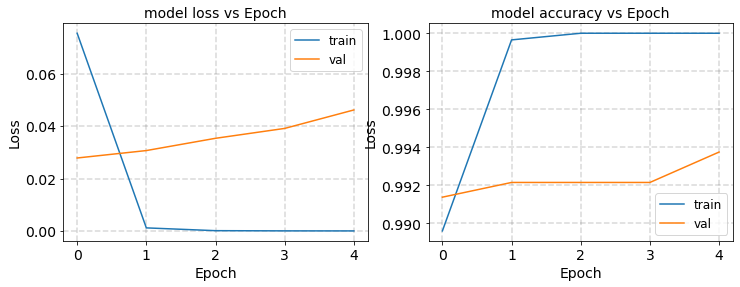

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0843 - accuracy: 0.9901 - val_loss: 0.0486 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 6.6498e-04 - accuracy: 0.9999 - val_loss: 0.0467 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 4.8776e-05 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 1.5179e-05 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 4.5808e-06 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9929


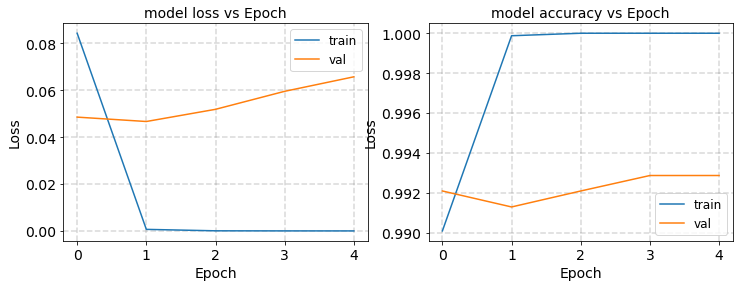

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1115 - accuracy: 0.9783 - val_loss: 0.0509 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0704 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 4s - loss: 1.7564e-04 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 4s - loss: 3.7651e-05 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 5s - loss: 1.3211e-05 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9859


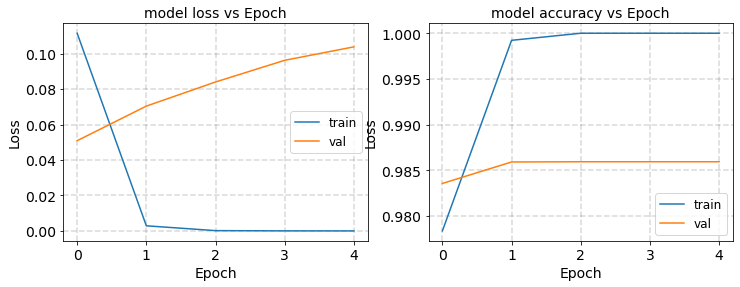

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0767 - accuracy: 0.9862 - val_loss: 0.0596 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0818 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0699 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 5.5901e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.9761e-05 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9890


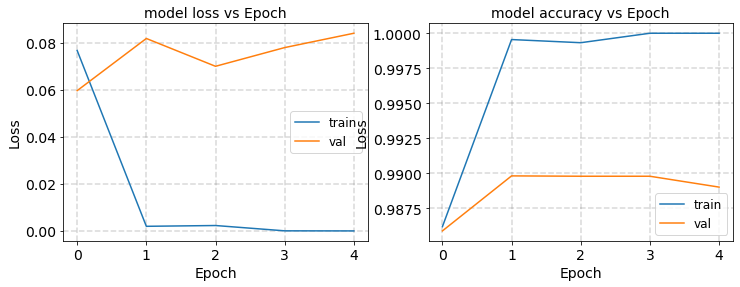

round2 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0838 - accuracy: 0.9849 - val_loss: 0.0803 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 6.3510e-04 - accuracy: 0.9999 - val_loss: 0.1100 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1065 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 4.6480e-05 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 1.6477e-05 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9866


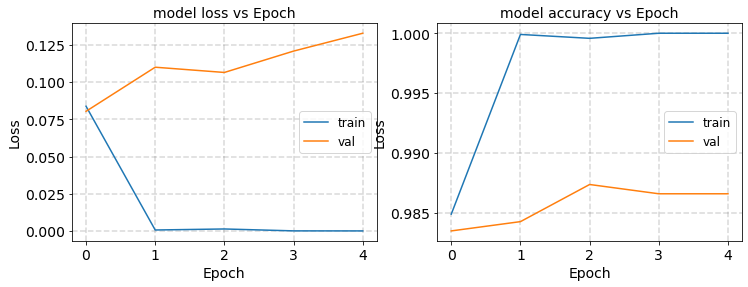

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0861 - accuracy: 0.9881 - val_loss: 0.0440 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0516 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 1.6605e-04 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 3.1915e-05 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.2815e-05 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9922


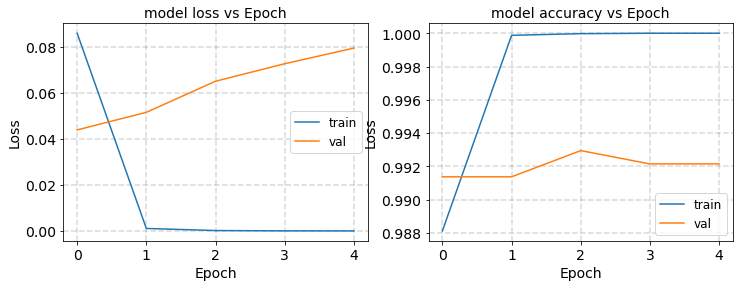

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0768 - accuracy: 0.9866 - val_loss: 0.0331 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0418 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 4s - loss: 2.5086e-04 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 2.9533e-05 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 4s - loss: 1.1491e-05 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9944


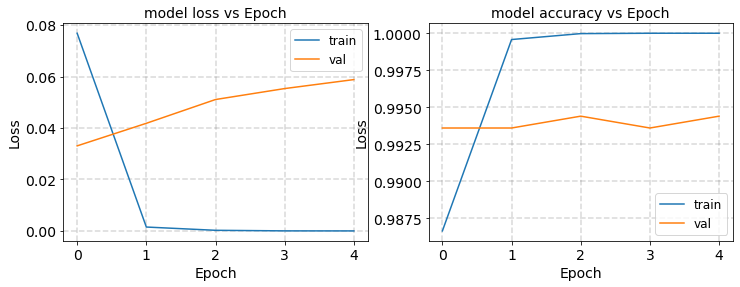

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1598 - accuracy: 0.9836 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 3.0806e-04 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 6.3849e-05 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 2.0567e-05 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9913


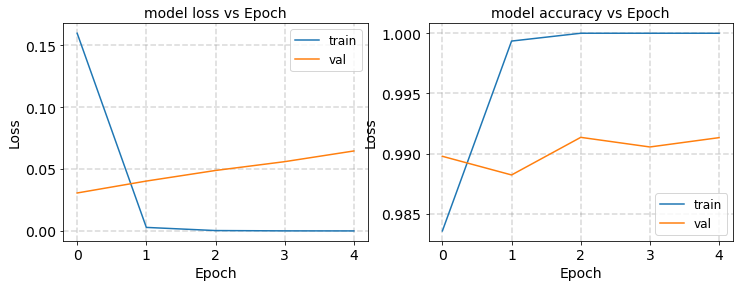

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 64)                8258      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

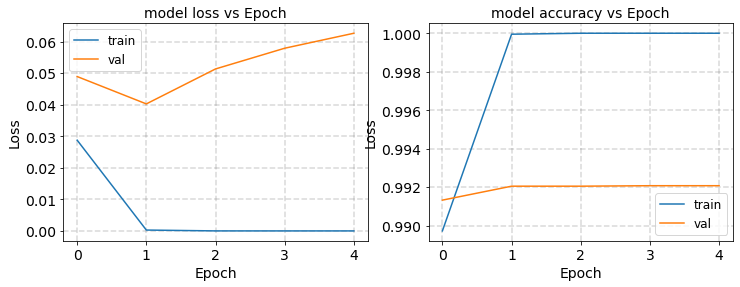

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0633 - accuracy: 0.9870 - val_loss: 0.0479 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0564 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 1.1542e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 2.9618e-05 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 1.1586e-05 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 0.9882


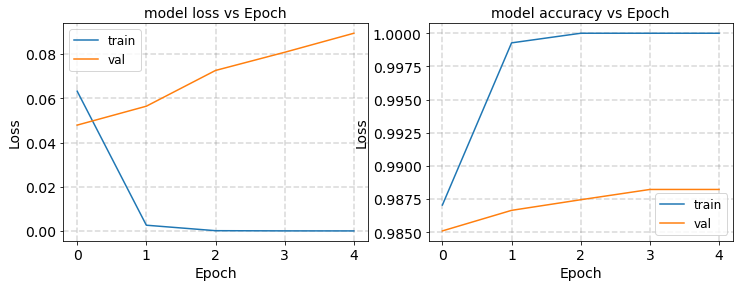

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0768 - accuracy: 0.9867 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0428 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0555 - val_accuracy: 0.9868
Epoch 4/5
1250/1250 - 3s - loss: 7.8237e-04 - accuracy: 0.9999 - val_loss: 0.0762 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 3s - loss: 9.1431e-05 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9891


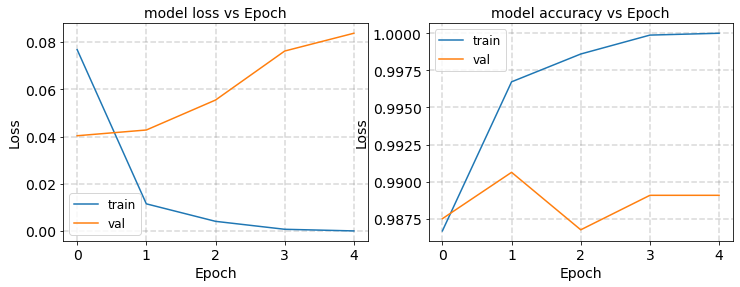

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0788 - accuracy: 0.9818 - val_loss: 0.0358 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0711 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0693 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 7.8020e-05 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9898


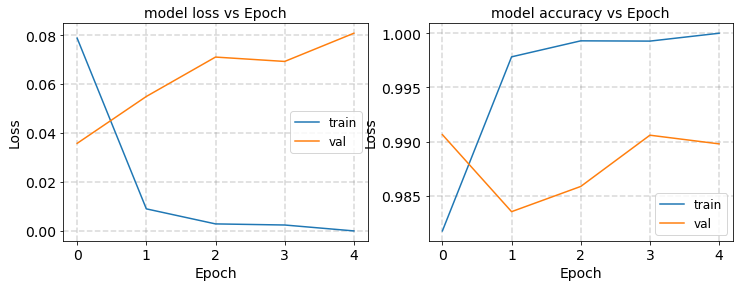

round1 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 4s - loss: 0.0752 - accuracy: 0.9871 - val_loss: 0.0355 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0464 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 5.0903e-04 - accuracy: 0.9998 - val_loss: 0.0632 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 5.2418e-05 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.6896e-05 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9929


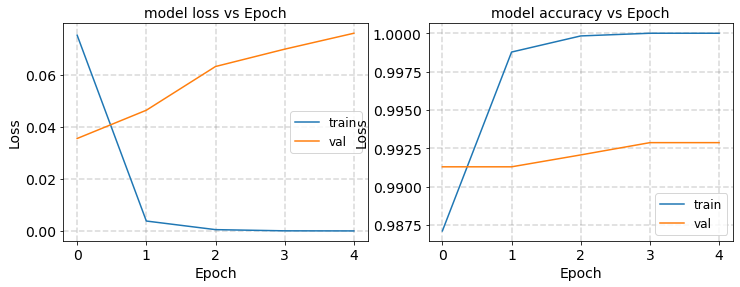

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0790 - accuracy: 0.9865 - val_loss: 0.0579 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0711 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0617 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 6.1486e-04 - accuracy: 0.9997 - val_loss: 0.0747 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 1.5495e-04 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9875


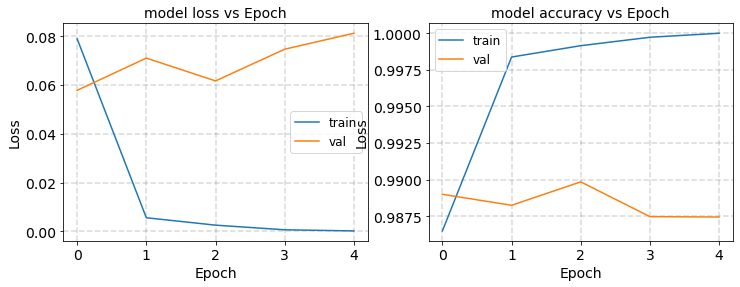

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1001 - accuracy: 0.9822 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 4s - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0698 - val_accuracy: 0.9820
Epoch 3/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0772 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 6.5038e-04 - accuracy: 0.9998 - val_loss: 0.0953 - val_accuracy: 0.9844
Epoch 5/5
1250/1250 - 4s - loss: 5.0884e-05 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9851


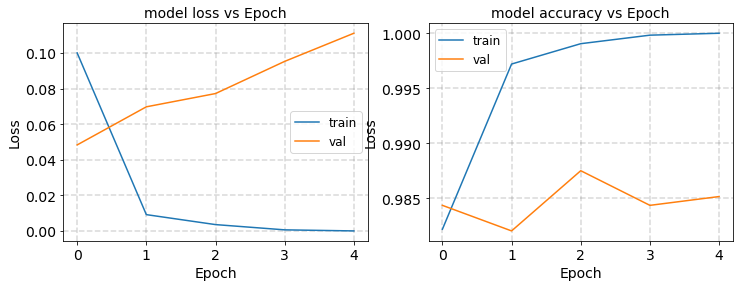

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1694 - accuracy: 0.9691 - val_loss: 0.0619 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0809 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0876 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.1113 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1106 - val_accuracy: 0.9866


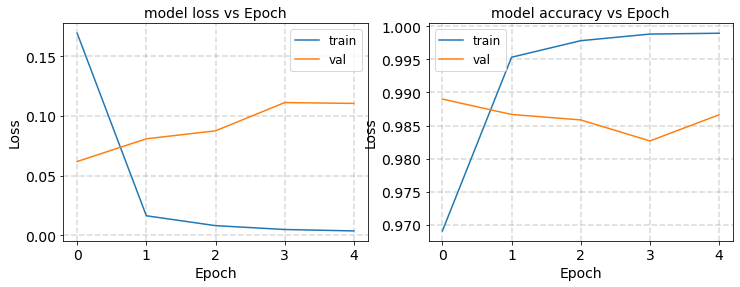

round2 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0900 - accuracy: 0.9847 - val_loss: 0.0580 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0706 - val_accuracy: 0.9828
Epoch 3/5
1250/1250 - 4s - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0798 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0931 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1237 - val_accuracy: 0.9859


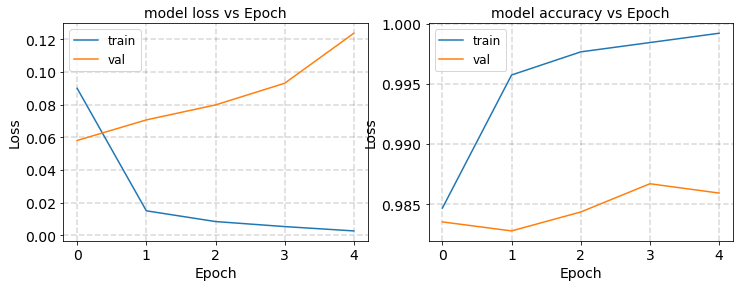

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1504 - accuracy: 0.9752 - val_loss: 0.0534 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0662 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0811 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 9.4364e-04 - accuracy: 0.9998 - val_loss: 0.1037 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1174 - val_accuracy: 0.9874


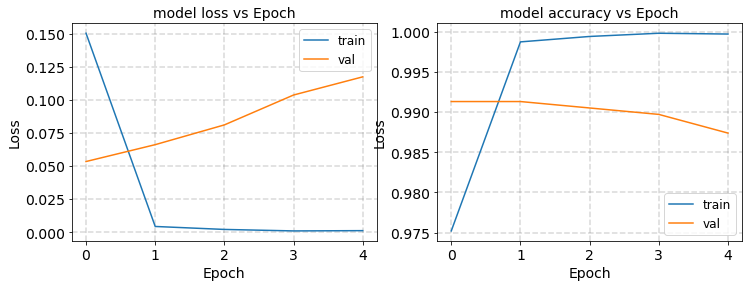

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1651 - accuracy: 0.9668 - val_loss: 0.0805 - val_accuracy: 0.9764
Epoch 2/5
1250/1250 - 4s - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0826 - val_accuracy: 0.9812
Epoch 3/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.1003 - val_accuracy: 0.9836
Epoch 4/5
1250/1250 - 4s - loss: 9.1644e-04 - accuracy: 0.9999 - val_loss: 0.1208 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 4s - loss: 7.8052e-04 - accuracy: 0.9999 - val_loss: 0.1337 - val_accuracy: 0.9851


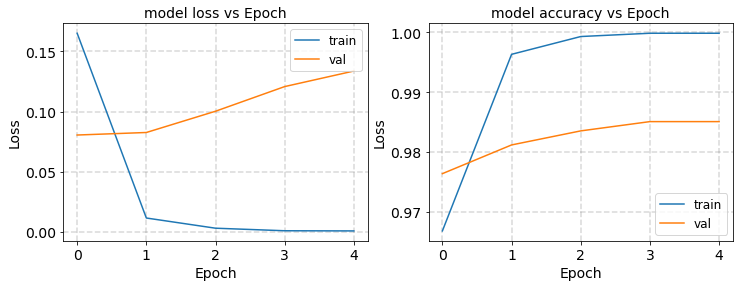

4
Epoch 1/5
1250/1250 - 4s - loss: 0.1071 - accuracy: 0.9815 - val_loss: 0.0558 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 4s - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.0751 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 4s - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0922 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1078 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1199 - val_accuracy: 0.9851


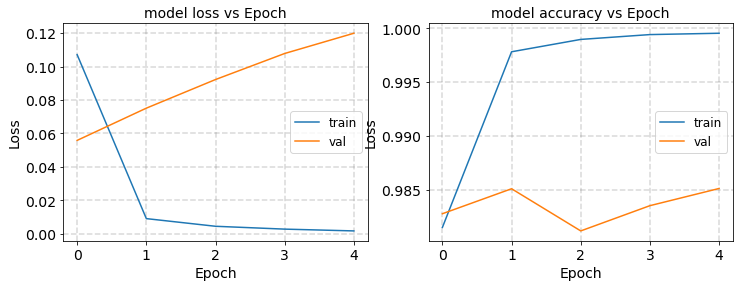

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 64)                8258      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

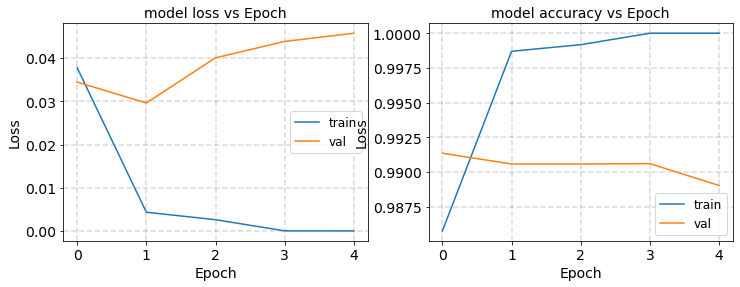

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0551 - accuracy: 0.9905 - val_loss: 0.0242 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0387 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.6463e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.1637e-05 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 4.9217e-06 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9929


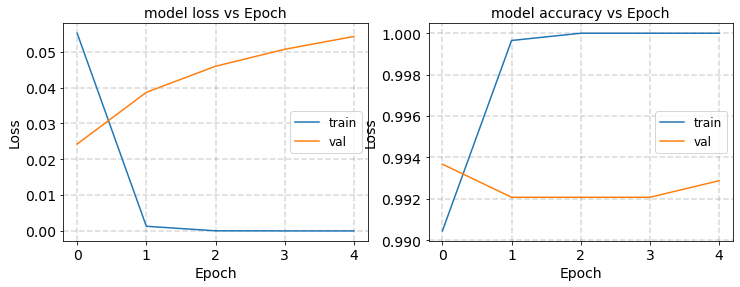

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0820 - accuracy: 0.9829 - val_loss: 0.0496 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0860 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 1.4611e-04 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 2.9680e-05 - accuracy: 1.0000 - val_loss: 0.1182 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 9.8831e-06 - accuracy: 1.0000 - val_loss: 0.1287 - val_accuracy: 0.9890


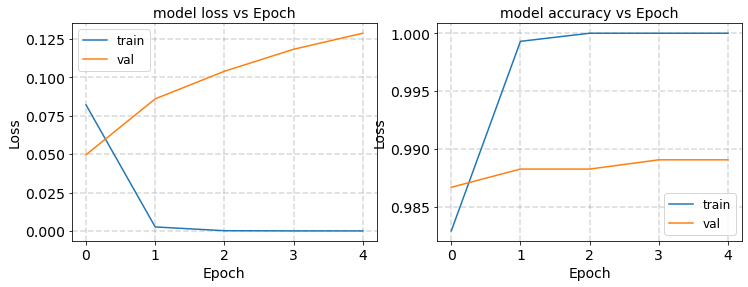

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1040 - accuracy: 0.9796 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0399 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0552 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0522 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 8.7986e-04 - accuracy: 0.9997 - val_loss: 0.0565 - val_accuracy: 0.9930


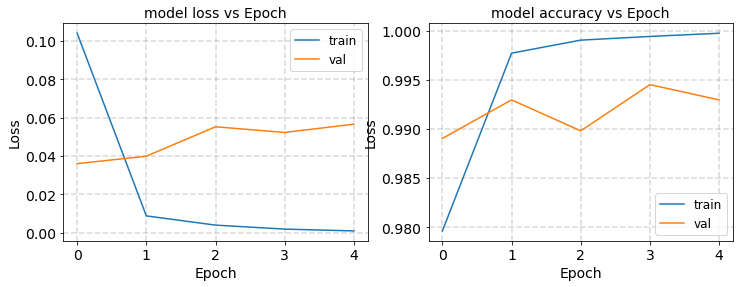

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0965 - accuracy: 0.9783 - val_loss: 0.0246 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0208 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0345 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0444 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0595 - val_accuracy: 0.9867


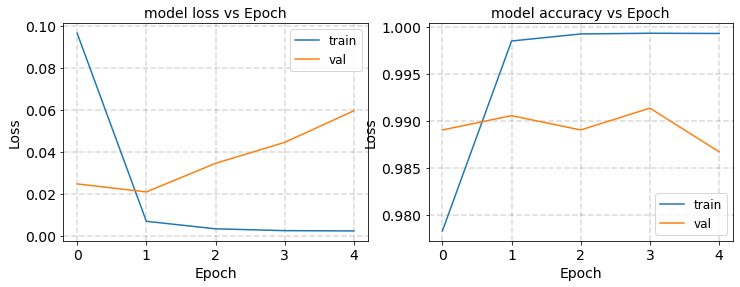

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0803 - accuracy: 0.9800 - val_loss: 0.0610 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0904 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1069 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 3s - loss: 4.6024e-04 - accuracy: 0.9998 - val_loss: 0.1224 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 8.8598e-05 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9851


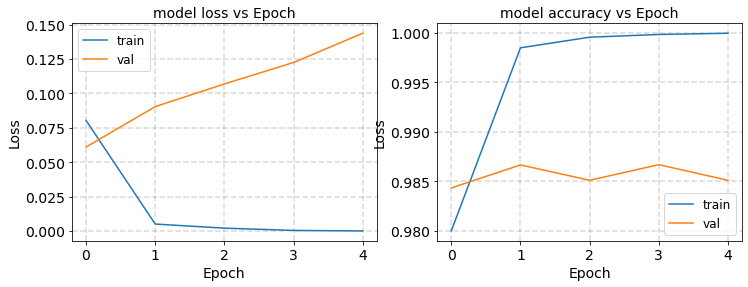

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0833 - accuracy: 0.9869 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0596 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.2105e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 3.3180e-05 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 1.2565e-05 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9913


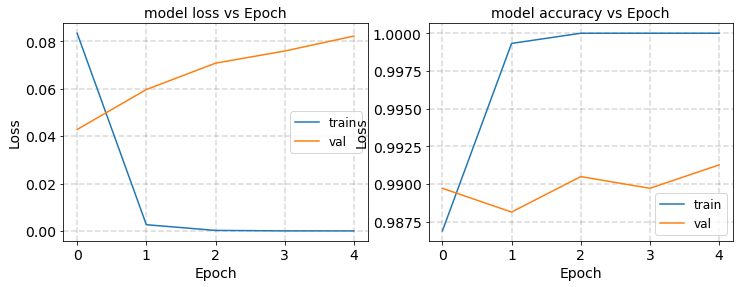

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1897 - accuracy: 0.9602 - val_loss: 0.0755 - val_accuracy: 0.9837
Epoch 2/5
1250/1250 - 2s - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0908 - val_accuracy: 0.9868
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1136 - val_accuracy: 0.9860
Epoch 4/5
1250/1250 - 3s - loss: 2.5174e-04 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 5.8003e-05 - accuracy: 1.0000 - val_loss: 0.1568 - val_accuracy: 0.9875


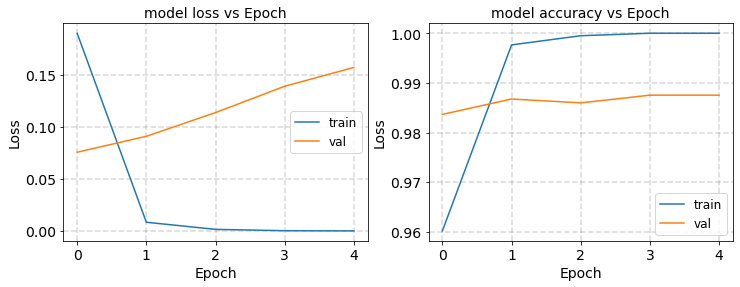

round2 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.1329 - accuracy: 0.9763 - val_loss: 0.0419 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.0522 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0555 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0706 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 4.3480e-04 - accuracy: 0.9999 - val_loss: 0.0978 - val_accuracy: 0.9827


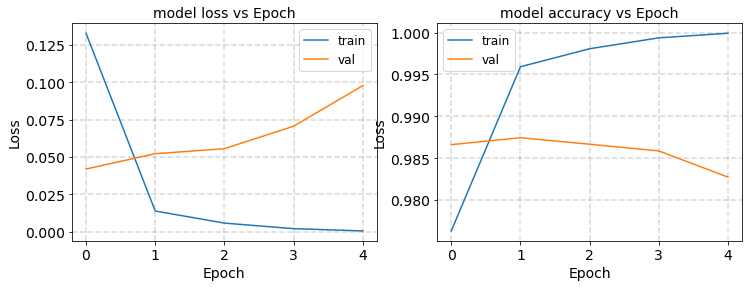

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1064 - accuracy: 0.9799 - val_loss: 0.0717 - val_accuracy: 0.9828
Epoch 2/5
1250/1250 - 3s - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0990 - val_accuracy: 0.9820
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1302 - val_accuracy: 0.9812
Epoch 4/5
1250/1250 - 3s - loss: 2.1367e-04 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 4.2419e-05 - accuracy: 1.0000 - val_loss: 0.1752 - val_accuracy: 0.9820


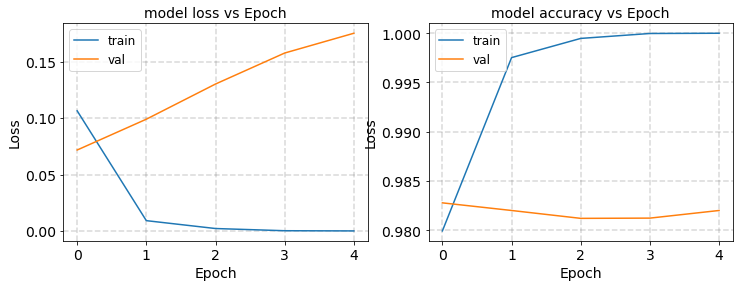

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0932 - accuracy: 0.9883 - val_loss: 0.0517 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0633 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0703 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0866 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 5.7782e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9890


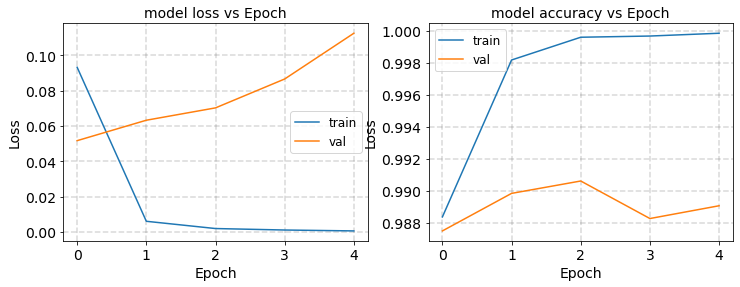

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1206 - accuracy: 0.9793 - val_loss: 0.0694 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0718 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0862 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0980 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0849 - val_accuracy: 0.9905


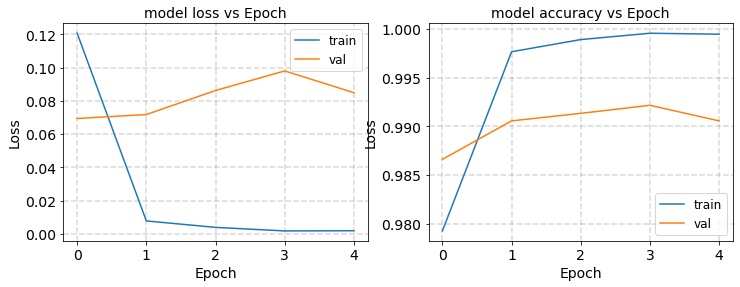

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 64)                8258      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

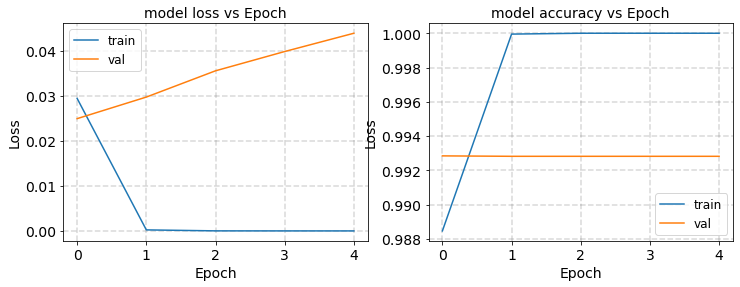

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0629 - accuracy: 0.9893 - val_loss: 0.0400 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0324 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 3.1194e-04 - accuracy: 0.9999 - val_loss: 0.0490 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 3.0422e-05 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 7.6070e-06 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9945


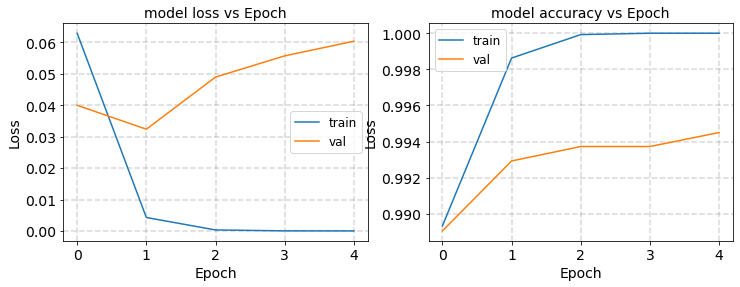

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0777 - accuracy: 0.9855 - val_loss: 0.0274 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0349 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0648 - val_accuracy: 0.9899
Epoch 4/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0390 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 4s - loss: 3.8675e-05 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9937


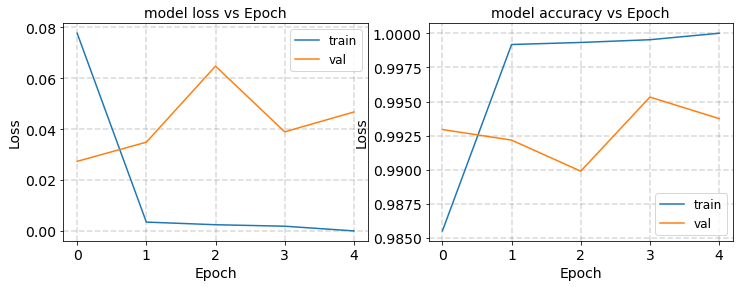

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0746 - accuracy: 0.9835 - val_loss: 0.0506 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0620 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 1.0966e-04 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 2.4986e-05 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 7.7638e-06 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9875


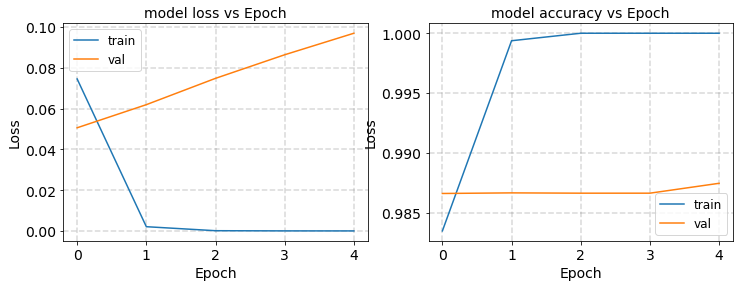

round1 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 4s - loss: 2.5477e-06 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 4s - loss: 1.0452e-06 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 4s - loss: 4.9358e-07 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 2.3888e-07 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 1.1644e-07 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9875


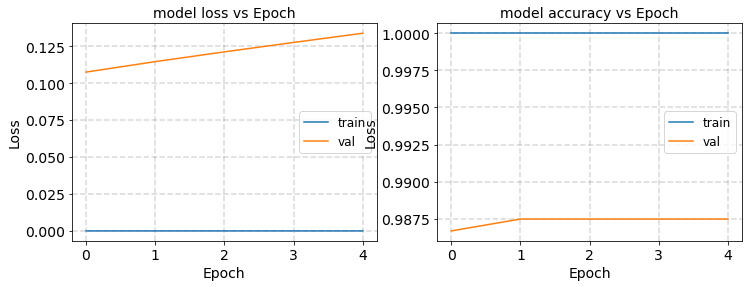

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0926 - accuracy: 0.9843 - val_loss: 0.0598 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 4s - loss: 4.6474e-04 - accuracy: 0.9999 - val_loss: 0.0800 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 3.7492e-05 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.3257e-05 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 5.9419e-06 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9898


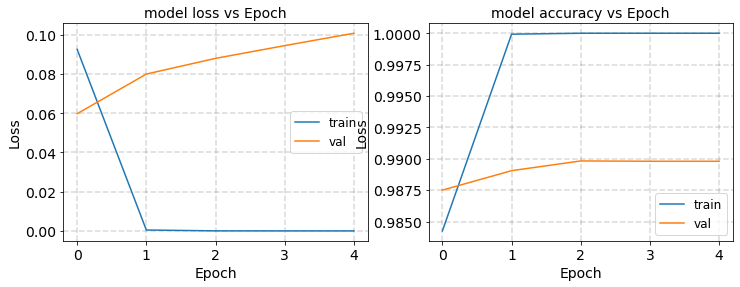

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0731 - accuracy: 0.9907 - val_loss: 0.0471 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0621 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 8.2500e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 1.9115e-05 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 4.1804e-06 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9897


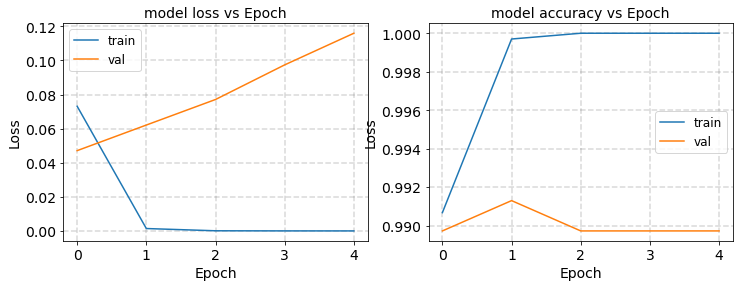

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1576 - accuracy: 0.9866 - val_loss: 0.0288 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0320 - val_accuracy: 0.9915
Epoch 3/5
1250/1250 - 4s - loss: 6.4556e-04 - accuracy: 0.9998 - val_loss: 0.0376 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 6.3638e-05 - accuracy: 1.0000 - val_loss: 0.0402 - val_accuracy: 0.9907
Epoch 5/5
1250/1250 - 4s - loss: 1.9668e-05 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9915


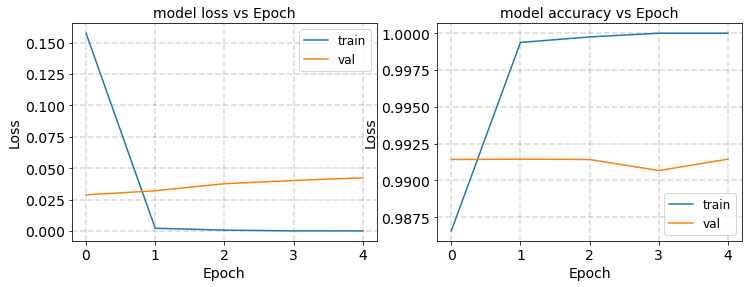

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.1137 - accuracy: 0.9860 - val_loss: 0.0669 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0734 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 6.0650e-04 - accuracy: 0.9998 - val_loss: 0.1023 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 2.1518e-04 - accuracy: 0.9999 - val_loss: 0.1101 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 2.9963e-05 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9898


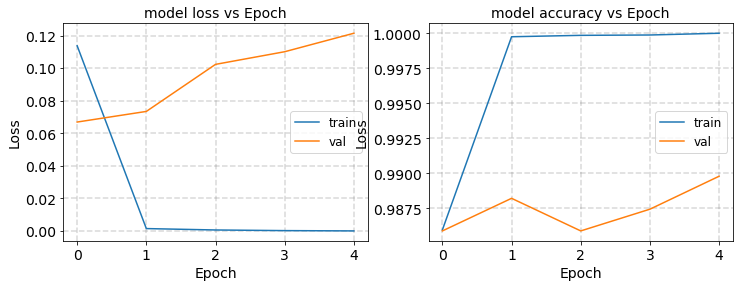

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0814 - accuracy: 0.9871 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0491 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 1.2875e-04 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 4.4963e-05 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.7898e-05 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9874


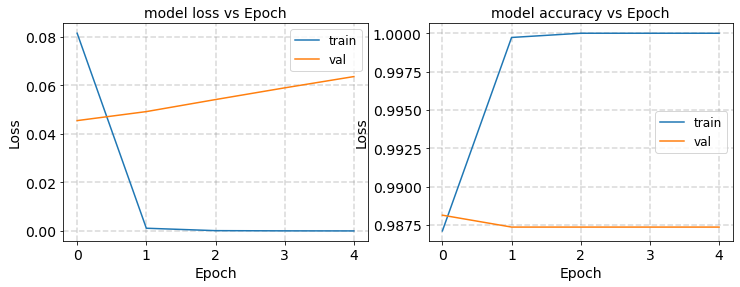

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0807 - accuracy: 0.9891 - val_loss: 0.0276 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0304 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 9.0850e-04 - accuracy: 0.9999 - val_loss: 0.0388 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 6.3483e-04 - accuracy: 0.9999 - val_loss: 0.0446 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0539 - val_accuracy: 0.9945


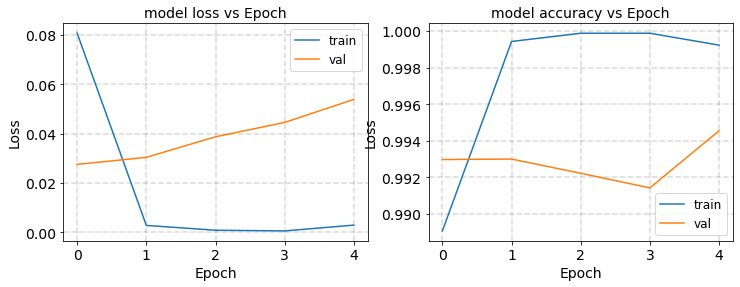

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0943 - accuracy: 0.9751 - val_loss: 0.0515 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0640 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.0005e-04 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 5.7830e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 2.0209e-05 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9883


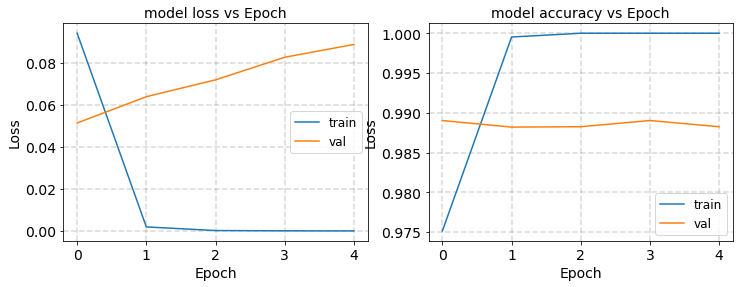

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 64)                8258      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

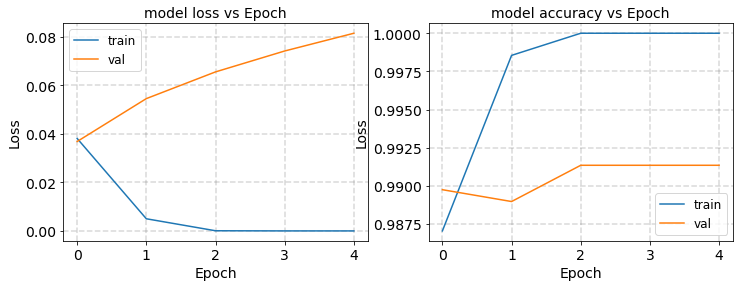

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0741 - accuracy: 0.9854 - val_loss: 0.0288 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0391 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0462 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0492 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 3.0759e-05 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9914


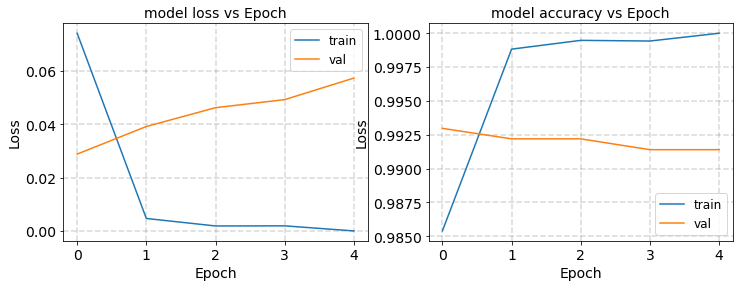

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0720 - accuracy: 0.9860 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0661 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.6694e-04 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 3.1712e-05 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.3616e-05 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9906


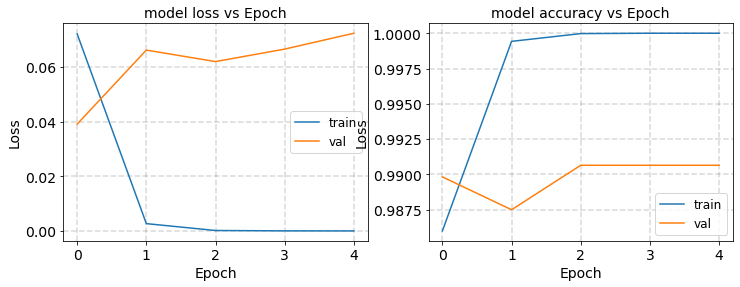

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0804 - accuracy: 0.9830 - val_loss: 0.0319 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0480 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 7.2469e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 1.4792e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 6.2600e-06 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9890


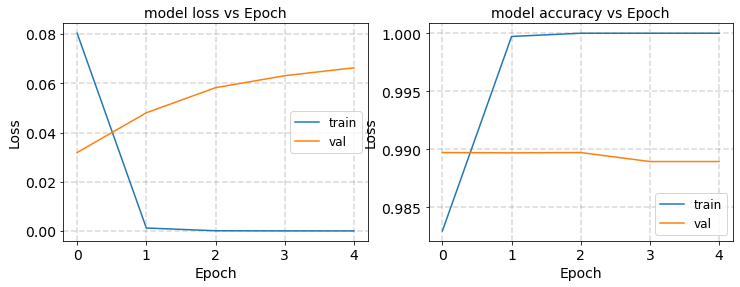

round1 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0681 - accuracy: 0.9901 - val_loss: 0.0379 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0626 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.0950e-04 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 2.2561e-05 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 7.4490e-06 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9859


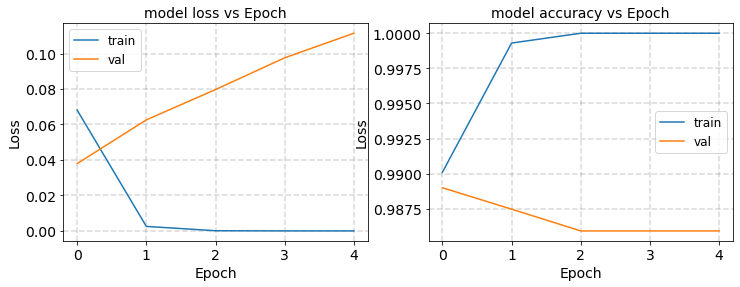

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0918 - accuracy: 0.9881 - val_loss: 0.0524 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 7.4833e-04 - accuracy: 0.9998 - val_loss: 0.0580 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 6.6444e-05 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 1.2110e-05 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 3.4633e-06 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9905


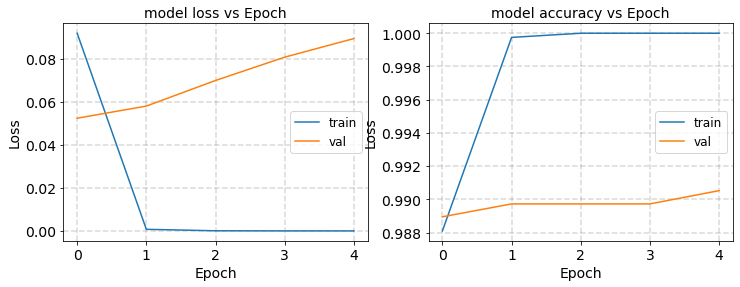

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0969 - accuracy: 0.9855 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0638 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 3s - loss: 7.1253e-04 - accuracy: 0.9998 - val_loss: 0.0639 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 6.0381e-05 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.4968e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9905


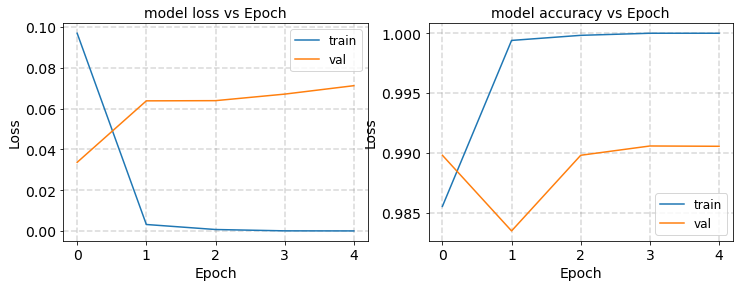

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0993 - accuracy: 0.9835 - val_loss: 0.0592 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0635 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 6.0358e-04 - accuracy: 0.9999 - val_loss: 0.0811 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 6.6539e-05 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 1.9918e-05 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9859


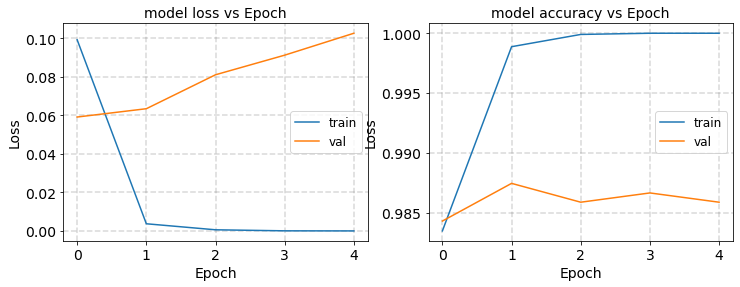

round2 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0712 - accuracy: 0.9922 - val_loss: 0.0505 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 8.3749e-04 - accuracy: 0.9999 - val_loss: 0.0597 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 1.6269e-04 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 4.9451e-05 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 1.8241e-05 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9905


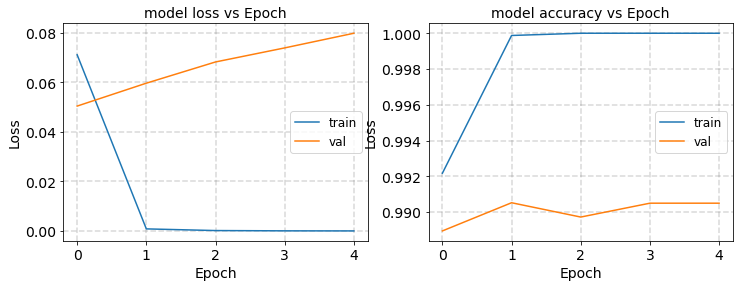

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0778 - accuracy: 0.9869 - val_loss: 0.0500 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 4.9989e-04 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 8.7265e-05 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 3s - loss: 2.5675e-05 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 8.7631e-06 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9882


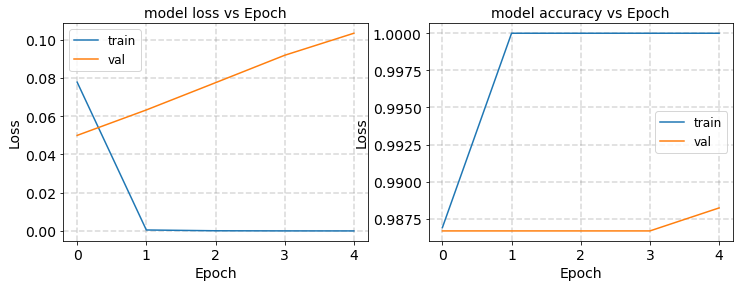

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0978 - accuracy: 0.9865 - val_loss: 0.0460 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0637 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 8.3363e-05 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 2.3190e-05 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 8.9879e-06 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9914


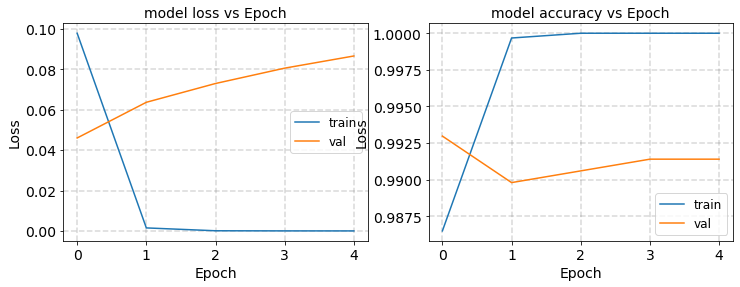

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0830 - accuracy: 0.9905 - val_loss: 0.0462 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0528 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 1.9746e-04 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.4662e-05 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.4720e-05 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9898


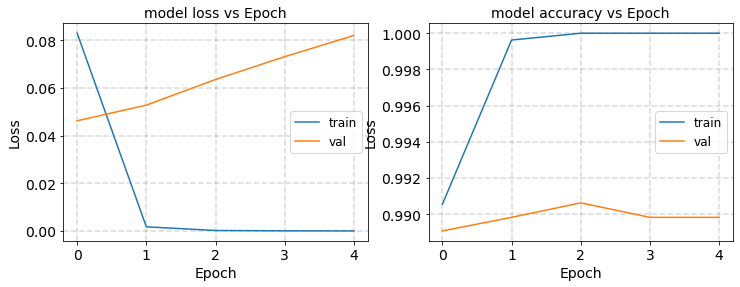

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 64)                8258      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

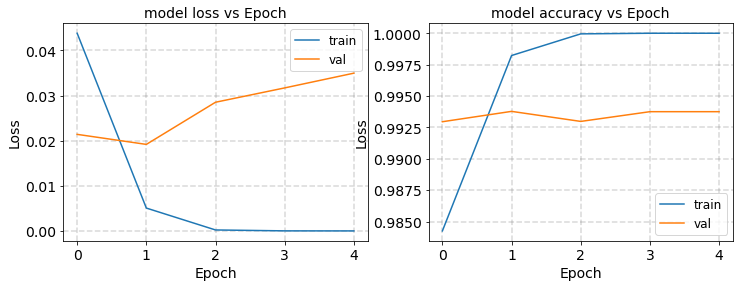

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0574 - accuracy: 0.9880 - val_loss: 0.0503 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0722 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.0043e-04 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 1.6953e-05 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 6.5655e-06 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9867


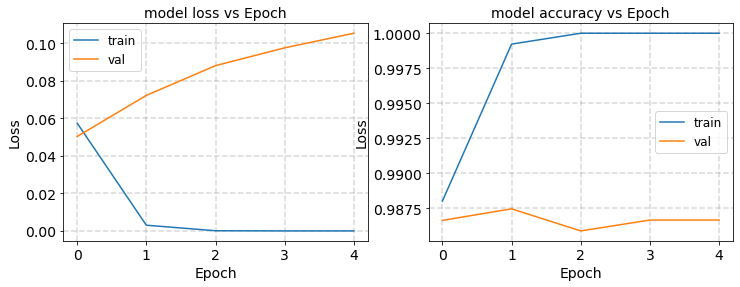

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0626 - accuracy: 0.9886 - val_loss: 0.0375 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0457 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 8.1265e-05 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.4943e-05 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 5.2991e-06 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9898


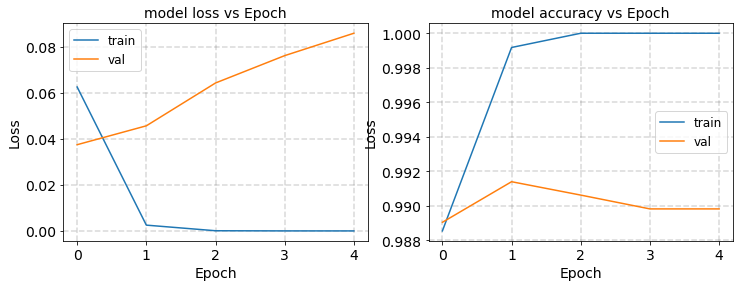

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0902 - accuracy: 0.9869 - val_loss: 0.0412 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0469 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 8.6212e-05 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 3s - loss: 1.4106e-05 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 4.7203e-06 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9936


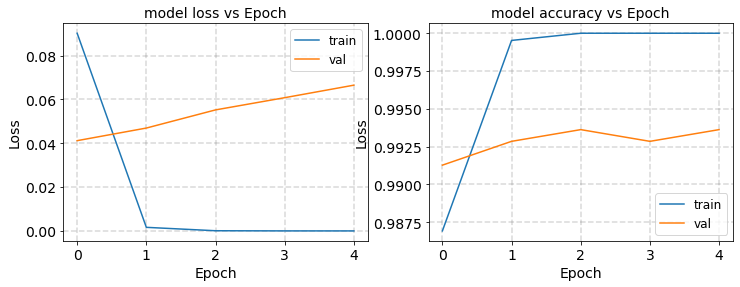

round1 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0740 - accuracy: 0.9876 - val_loss: 0.0273 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0340 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 3.6720e-04 - accuracy: 0.9999 - val_loss: 0.0431 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 3.8965e-05 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 1.0782e-05 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9930


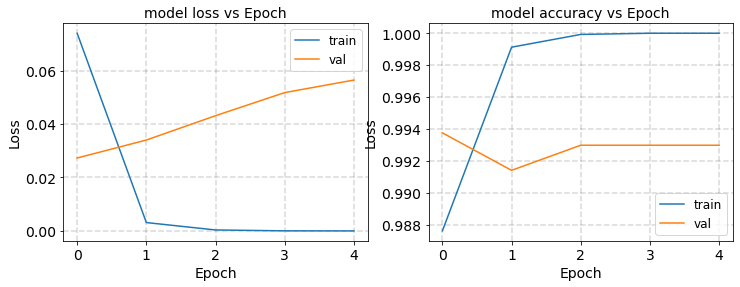

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0808 - accuracy: 0.9868 - val_loss: 0.0559 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0765 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 1.2735e-04 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 2.8745e-05 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 9.8775e-06 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9898


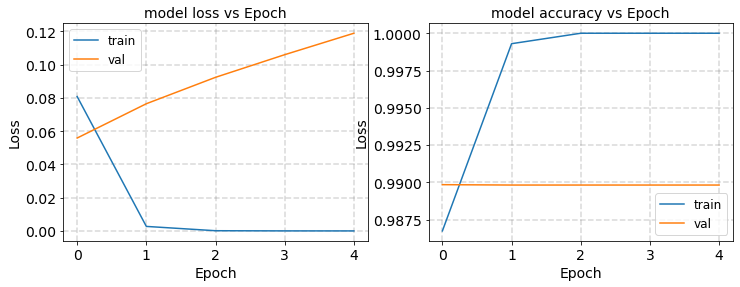

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0923 - accuracy: 0.9868 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0463 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 7.5609e-04 - accuracy: 0.9999 - val_loss: 0.0597 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 1.3011e-04 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 3.0390e-05 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9898


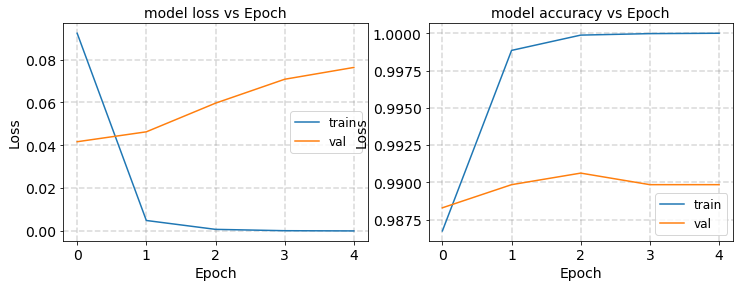

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0791 - accuracy: 0.9915 - val_loss: 0.0507 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 7.9091e-04 - accuracy: 0.9998 - val_loss: 0.0693 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 2.4261e-05 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9928
Epoch 4/5
1250/1250 - 3s - loss: 5.7801e-06 - accuracy: 1.0000 - val_loss: 0.0890 - val_accuracy: 0.9928
Epoch 5/5
1250/1250 - 4s - loss: 2.0766e-06 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9928


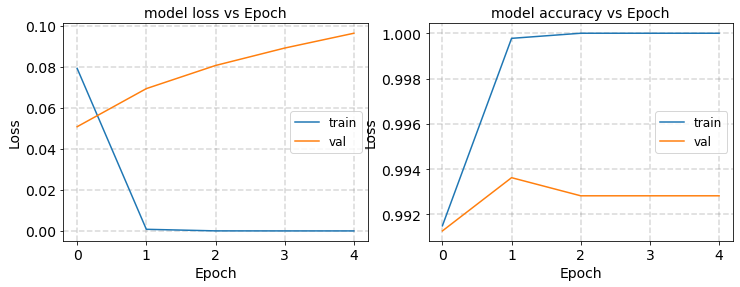

round2 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0902 - accuracy: 0.9857 - val_loss: 0.0380 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0376 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0527 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.5853e-04 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 2.6033e-05 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9945


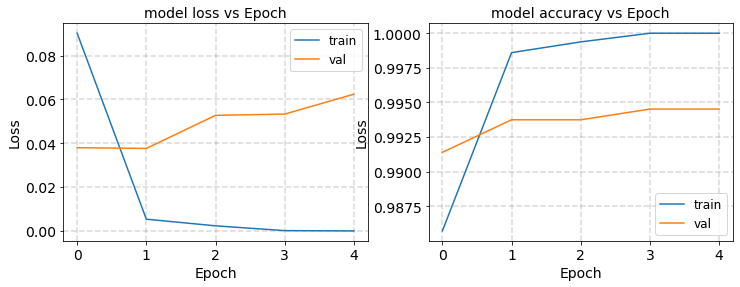

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0981 - accuracy: 0.9872 - val_loss: 0.0664 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0888 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 6.4499e-04 - accuracy: 0.9998 - val_loss: 0.1135 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1103 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 3.0000e-05 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9898


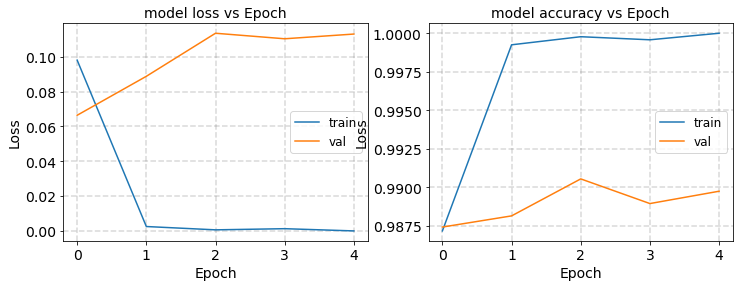

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0967 - accuracy: 0.9853 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0514 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 6.3028e-04 - accuracy: 0.9998 - val_loss: 0.0457 - val_accuracy: 0.9946
Epoch 5/5
1250/1250 - 3s - loss: 6.8124e-05 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9938


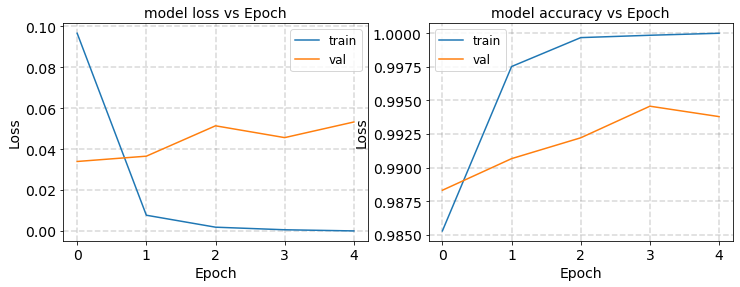

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1166 - accuracy: 0.9813 - val_loss: 0.0396 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0480 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 4.1789e-04 - accuracy: 0.9999 - val_loss: 0.0583 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 8.1529e-05 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 2.8523e-05 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9929


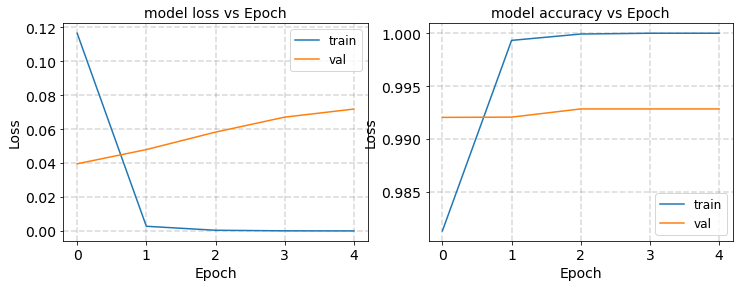

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 64)                8258      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

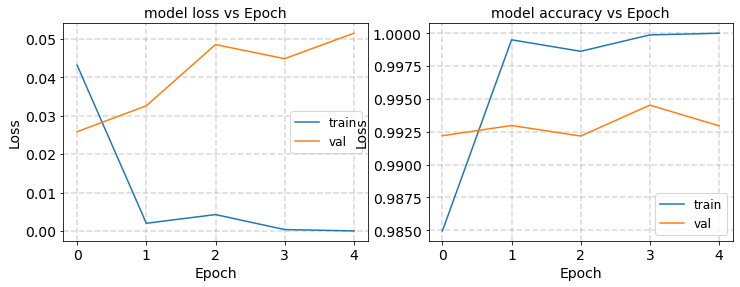

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0594 - accuracy: 0.9884 - val_loss: 0.0340 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0438 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 6.0263e-04 - accuracy: 0.9998 - val_loss: 0.0621 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 2.4288e-05 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.7807e-06 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9922


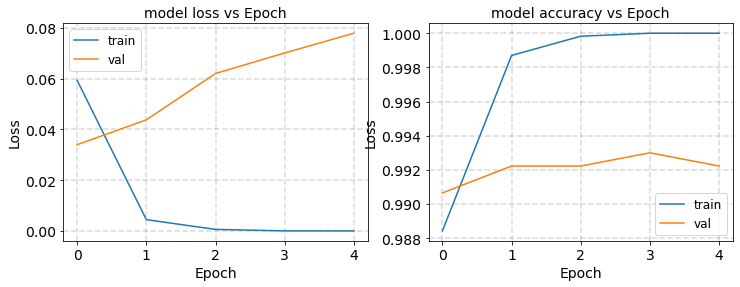

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0853 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0689 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 1.1060e-04 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 2.8342e-05 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 1.0504e-05 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9874


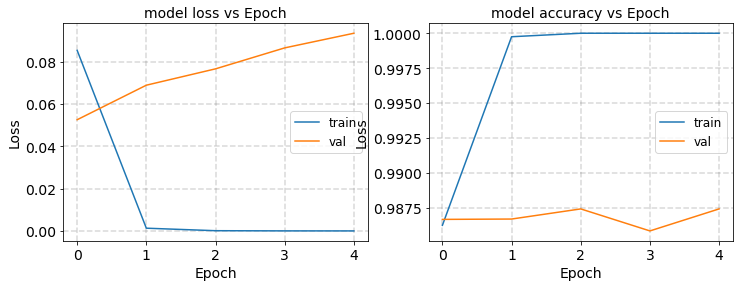

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0575 - accuracy: 0.9904 - val_loss: 0.0315 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.5707e-04 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 4.8079e-05 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.7890e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 7.4441e-06 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9921


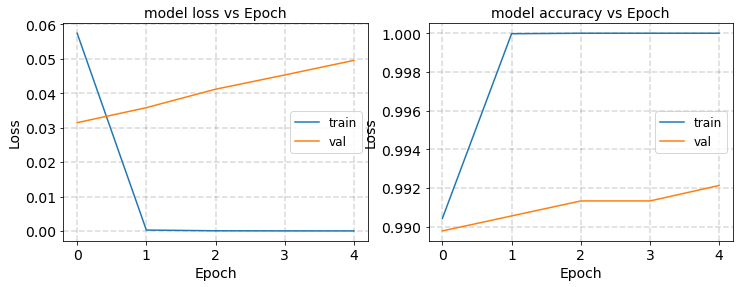

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9839 - val_loss: 0.0379 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0500 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 6.5148e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 1.2589e-05 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9906


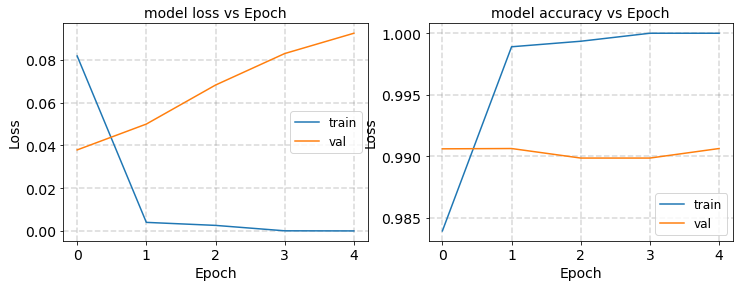

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0607 - accuracy: 0.9916 - val_loss: 0.0425 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 2.4137e-04 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 2.1953e-05 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 7.8572e-06 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 3.7841e-06 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9921


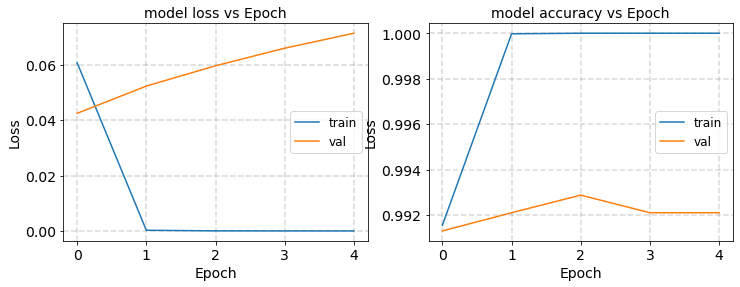

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1004 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0388 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0431 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 8.7146e-05 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.8849e-05 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9930


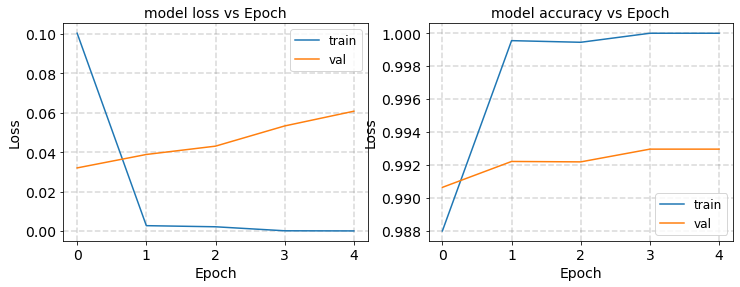

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1005 - accuracy: 0.9817 - val_loss: 0.0518 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0549 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0829 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 5.4694e-05 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 1.4214e-05 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9866


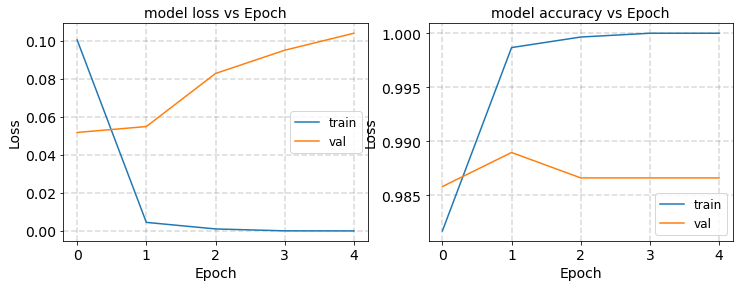

round2 [6 7 4 2]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0970 - accuracy: 0.9846 - val_loss: 0.0407 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0496 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.7235e-04 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 7.1134e-05 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.5207e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9905


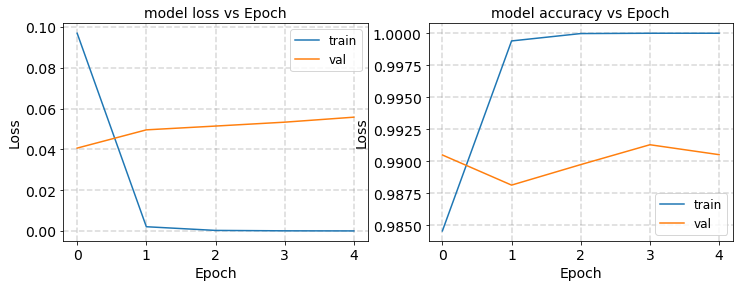

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1039 - accuracy: 0.9854 - val_loss: 0.0250 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0385 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 3.9605e-04 - accuracy: 0.9999 - val_loss: 0.0515 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.2071e-04 - accuracy: 0.9999 - val_loss: 0.0560 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.1377e-05 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9922


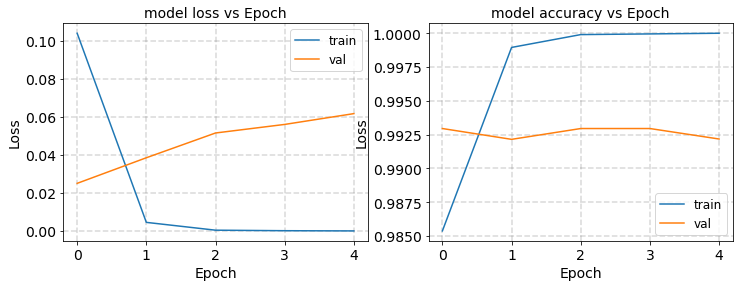

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0722 - accuracy: 0.9887 - val_loss: 0.0426 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0737 - val_accuracy: 0.9891
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0861 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 7.2970e-04 - accuracy: 0.9998 - val_loss: 0.0959 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 3s - loss: 2.9107e-05 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9899


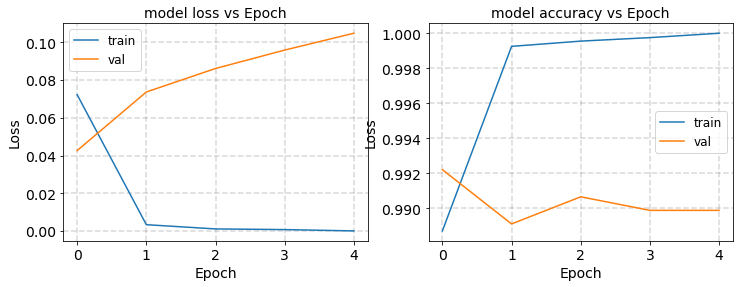

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1358 - accuracy: 0.9810 - val_loss: 0.0349 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0470 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.8957e-04 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 3.6326e-05 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.1357e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9906


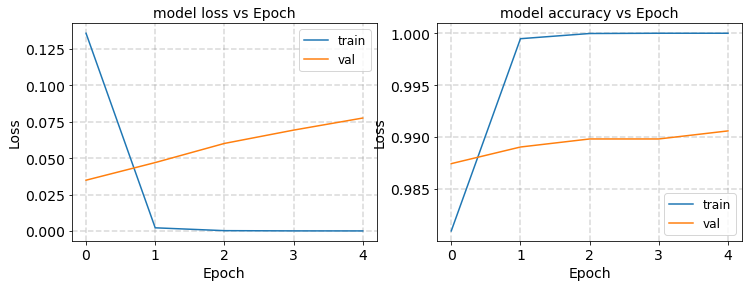

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 64)                8258      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

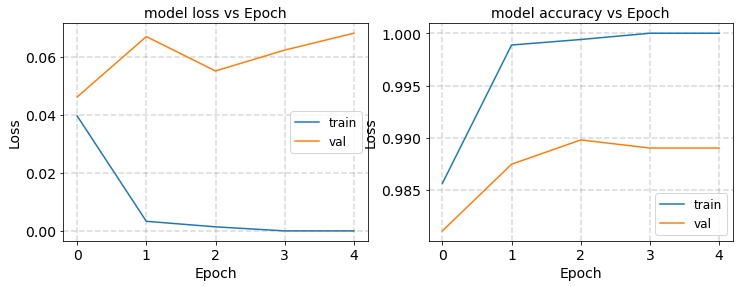

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0682 - accuracy: 0.9823 - val_loss: 0.0392 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0414 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0529 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0534 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0547 - val_accuracy: 0.9914


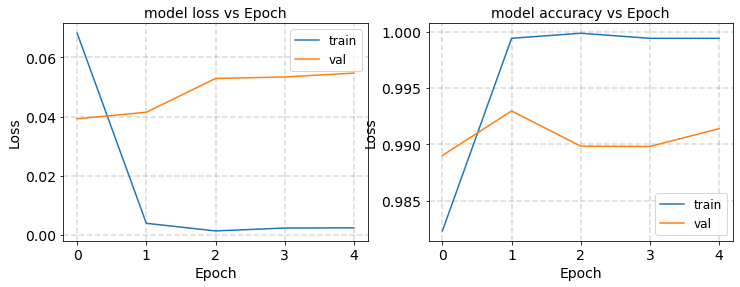

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0551 - accuracy: 0.9898 - val_loss: 0.0405 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0497 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 1.1639e-04 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 1.5355e-05 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 5.2938e-06 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9913


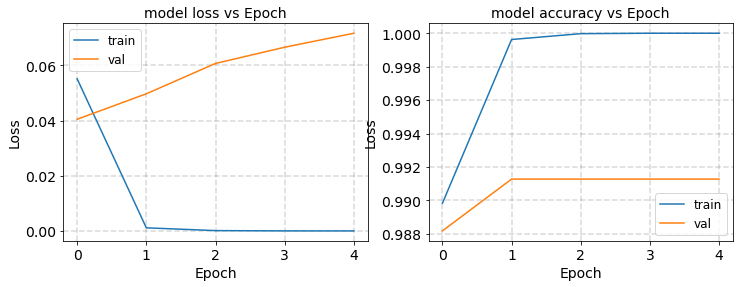

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0927 - accuracy: 0.9873 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0472 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 2.0206e-04 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 3.1956e-05 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 1.2696e-05 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9906


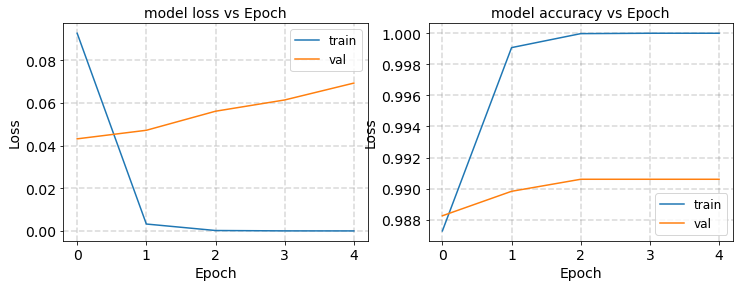

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 5.3287e-06 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 1.7942e-06 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 6.3914e-07 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 2.7431e-07 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.2944e-07 - accuracy: 1.0000 - val_loss: 0.1069 - val_accuracy: 0.9906


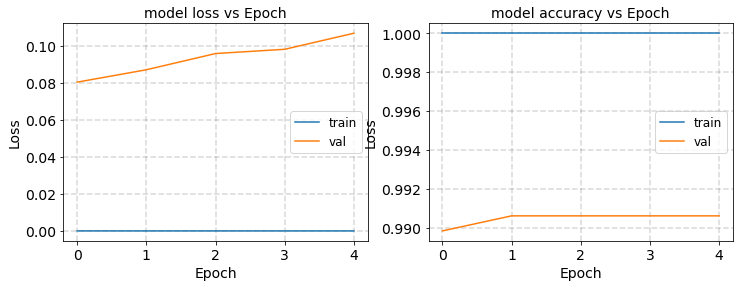

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1300 - accuracy: 0.9812 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 2s - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0703 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1098 - val_accuracy: 0.9835
Epoch 4/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0738 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 8.7784e-05 - accuracy: 1.0000 - val_loss: 0.0911 - val_accuracy: 0.9866


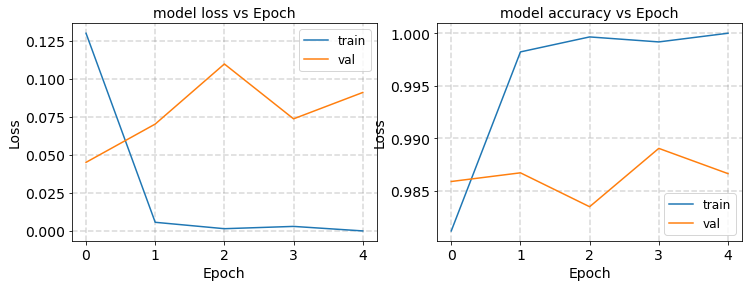

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0779 - accuracy: 0.9850 - val_loss: 0.0508 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0605 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 2s - loss: 4.2063e-04 - accuracy: 0.9999 - val_loss: 0.0718 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 2s - loss: 3.7746e-05 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 1.0975e-05 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9897


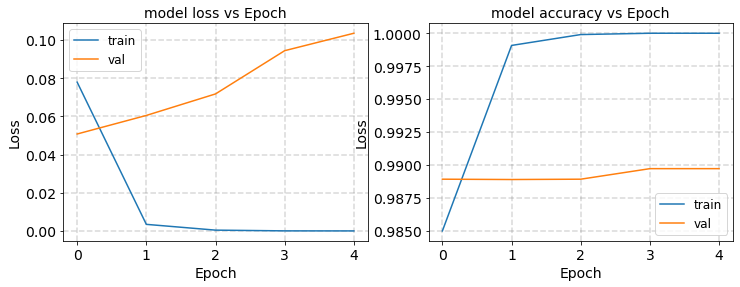

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1038 - accuracy: 0.9845 - val_loss: 0.0575 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0804 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 3.6246e-04 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 6.1005e-05 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 2.1556e-05 - accuracy: 1.0000 - val_loss: 0.1278 - val_accuracy: 0.9875


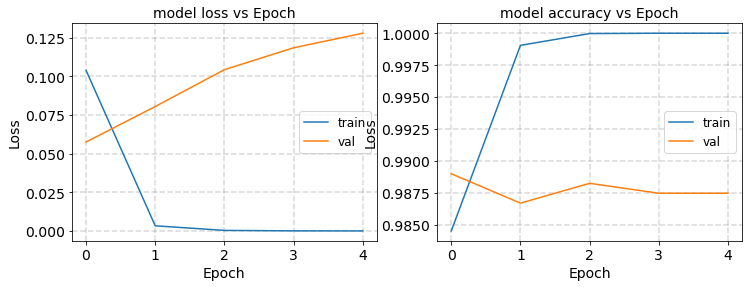

round2 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0898 - accuracy: 0.9864 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0482 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.1488e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 5.4943e-05 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 1.9079e-05 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9922


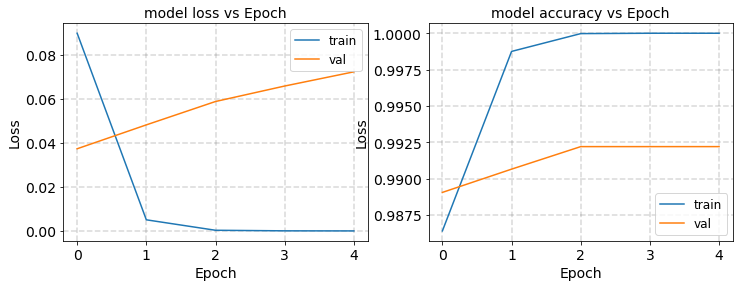

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0936 - accuracy: 0.9840 - val_loss: 0.0537 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0623 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0879 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 2.8147e-04 - accuracy: 0.9999 - val_loss: 0.0897 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 3.1254e-05 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9874


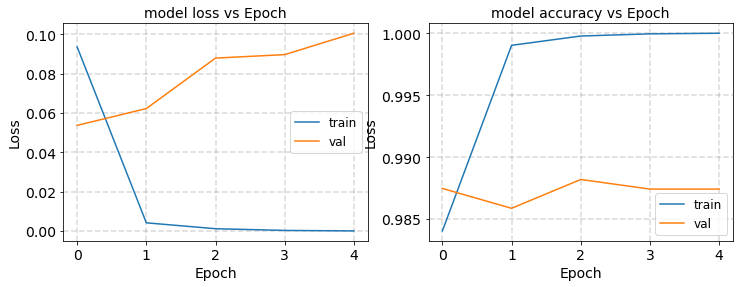

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0818 - accuracy: 0.9821 - val_loss: 0.0333 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0369 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0485 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.2090e-04 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 3s - loss: 3.2378e-05 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9899


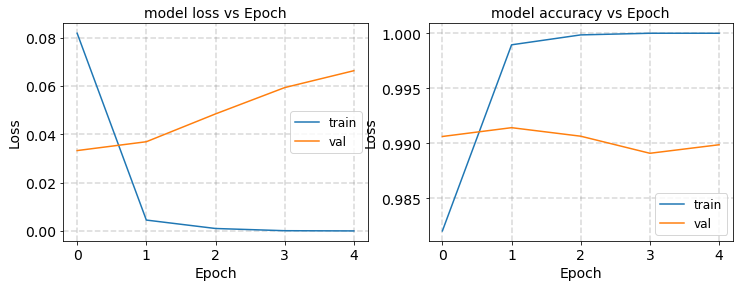

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0766 - accuracy: 0.9872 - val_loss: 0.0324 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0399 - val_accuracy: 0.9928
Epoch 3/5
1250/1250 - 3s - loss: 2.2517e-04 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9912
Epoch 4/5
1250/1250 - 3s - loss: 4.2544e-05 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 1.3954e-05 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9912


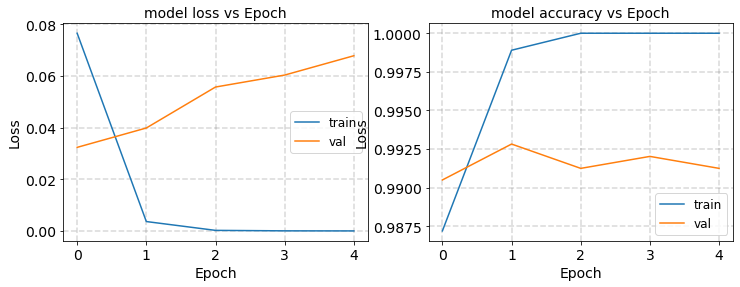

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 64)                8258      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

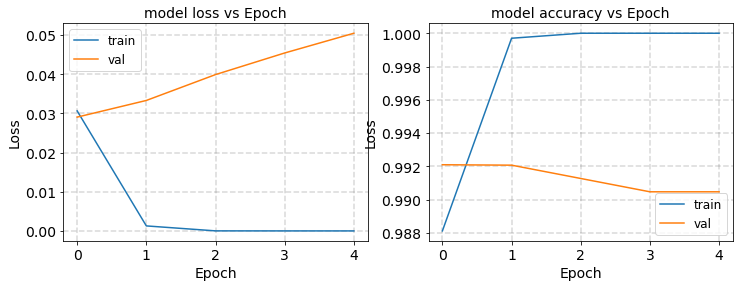

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0679 - accuracy: 0.9876 - val_loss: 0.0419 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0480 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.1358e-04 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 2.4554e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 9.6452e-06 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9913


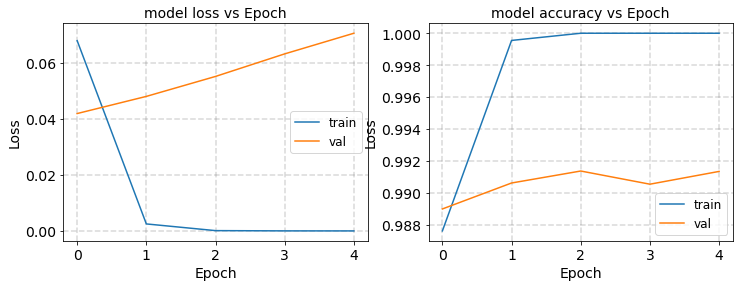

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0729 - accuracy: 0.9853 - val_loss: 0.0345 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0460 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0559 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 3.2645e-04 - accuracy: 0.9999 - val_loss: 0.0668 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 2.6786e-05 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9890


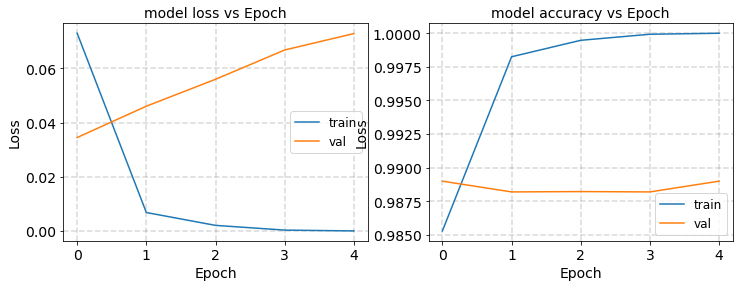

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0820 - accuracy: 0.9823 - val_loss: 0.0401 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0480 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0623 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 5.7044e-04 - accuracy: 0.9999 - val_loss: 0.0726 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0552 - val_accuracy: 0.9914


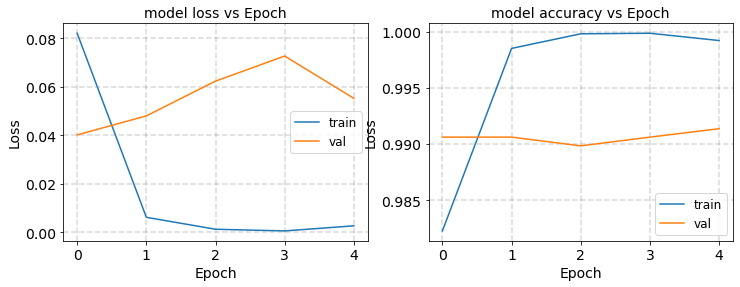

round1 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0707 - accuracy: 0.9858 - val_loss: 0.0253 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0306 - val_accuracy: 0.9915
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0409 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 6.2757e-04 - accuracy: 0.9998 - val_loss: 0.0507 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 6.6298e-04 - accuracy: 0.9998 - val_loss: 0.0698 - val_accuracy: 0.9899


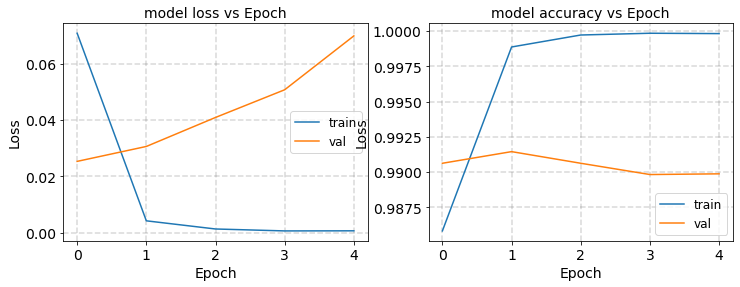

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1698 - accuracy: 0.9704 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0556 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0538 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 5.6623e-05 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9921


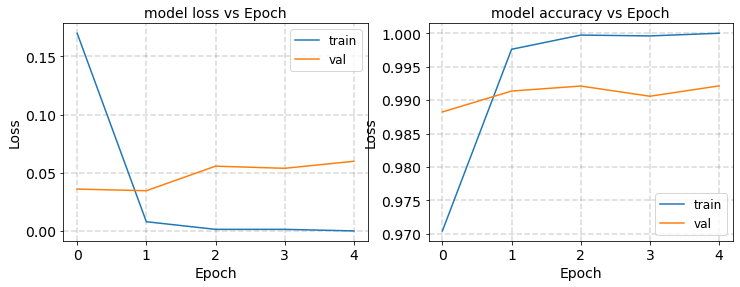

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1177 - accuracy: 0.9764 - val_loss: 0.0675 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0702 - val_accuracy: 0.9852
Epoch 3/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0882 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 4.4345e-04 - accuracy: 0.9999 - val_loss: 0.1062 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 1.5360e-04 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 0.9859


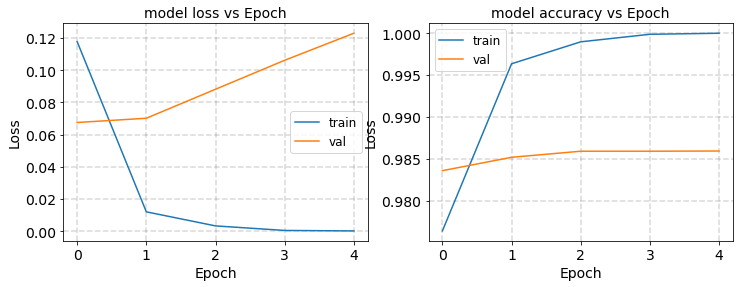

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1133 - accuracy: 0.9793 - val_loss: 0.0473 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0448 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0642 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0753 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0989 - val_accuracy: 0.9891


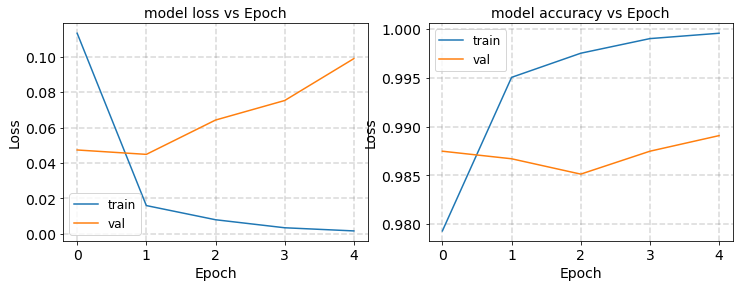

round2 [2 7 6 4]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1036 - accuracy: 0.9840 - val_loss: 0.0724 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0927 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 2s - loss: 6.7208e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9820
Epoch 4/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1059 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 3.6084e-04 - accuracy: 0.9998 - val_loss: 0.1307 - val_accuracy: 0.9836


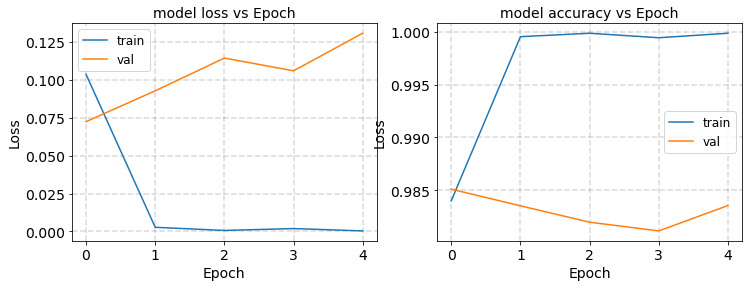

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0909 - accuracy: 0.9842 - val_loss: 0.0380 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0503 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0522 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 8.4003e-04 - accuracy: 0.9998 - val_loss: 0.0631 - val_accuracy: 0.9914


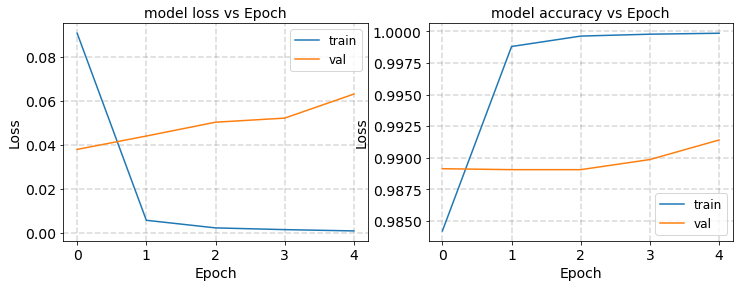

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0675 - accuracy: 0.9889 - val_loss: 0.0492 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0697 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0835 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0873 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 9.4365e-04 - accuracy: 0.9998 - val_loss: 0.1008 - val_accuracy: 0.9882


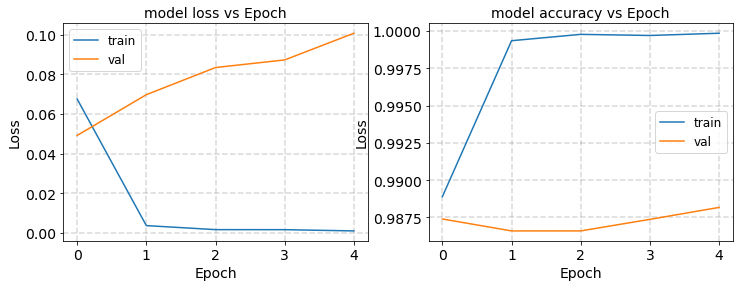

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0754 - accuracy: 0.9845 - val_loss: 0.0640 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0744 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0906 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1013 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1289 - val_accuracy: 0.9866


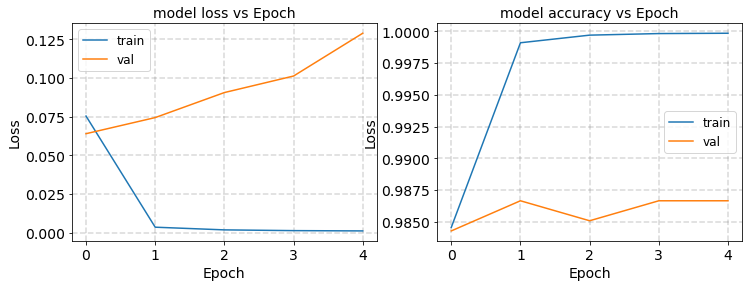

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 64)                8258      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

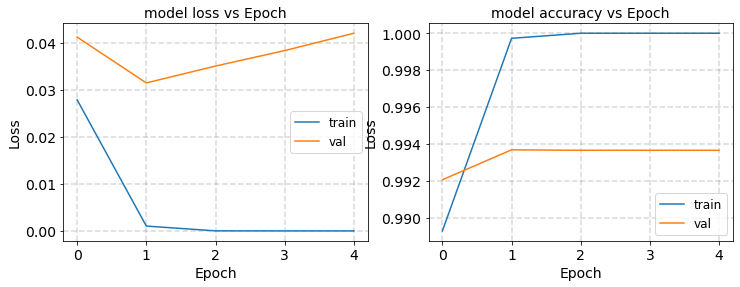

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0583 - accuracy: 0.9880 - val_loss: 0.0397 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0571 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 4.2907e-04 - accuracy: 0.9998 - val_loss: 0.0720 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 1.1642e-04 - accuracy: 1.0000 - val_loss: 0.0831 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 2.2121e-05 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9883


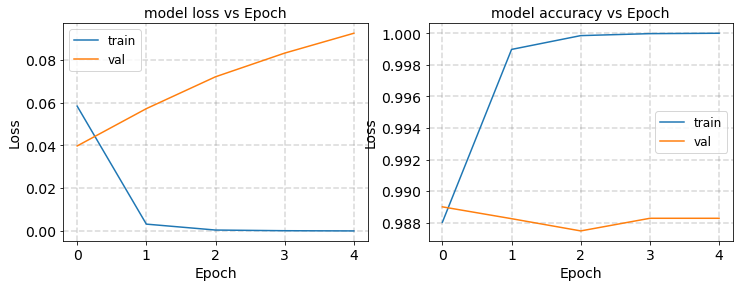

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0775 - accuracy: 0.9864 - val_loss: 0.0486 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.0461 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0576 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 3.0324e-04 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 3.4820e-05 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9914


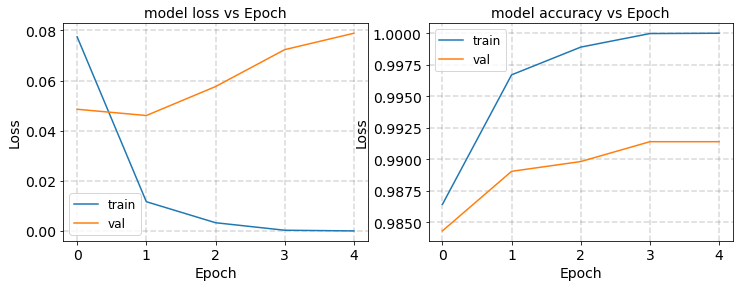

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0960 - accuracy: 0.9799 - val_loss: 0.0349 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0448 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0655 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 1.0920e-04 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 1.5174e-05 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9875


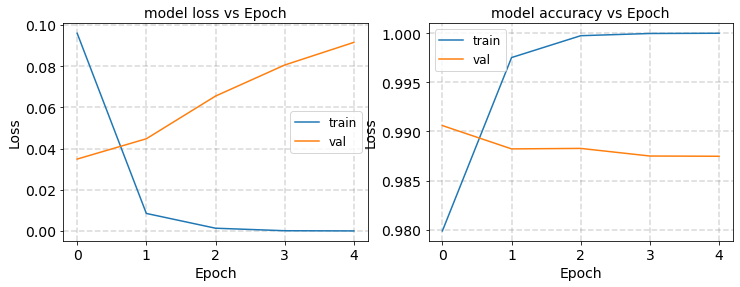

round1 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0810 - accuracy: 0.9881 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0333 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 3s - loss: 5.7417e-04 - accuracy: 0.9999 - val_loss: 0.0406 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 3s - loss: 6.2219e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 2.3206e-05 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9944


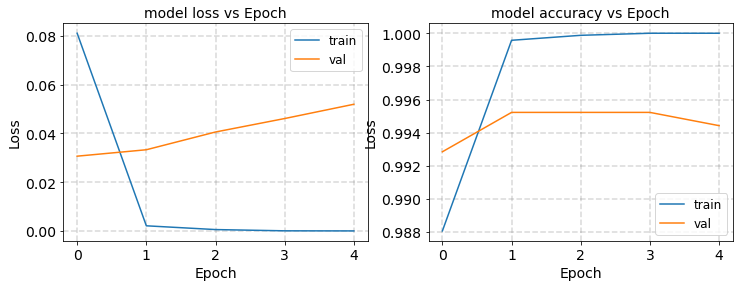

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0725 - accuracy: 0.9859 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0730 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0946 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 5.4193e-05 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 1.6032e-05 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9866


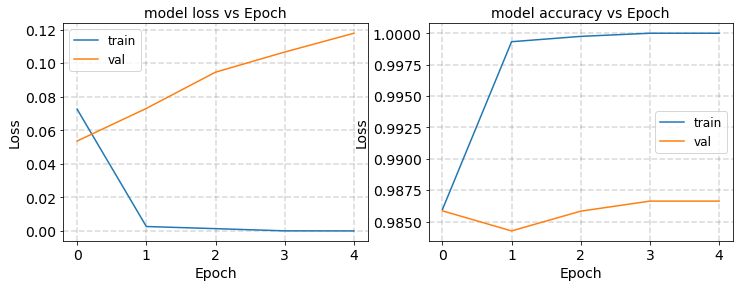

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0916 - accuracy: 0.9847 - val_loss: 0.0495 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0150 - accuracy: 0.9945 - val_loss: 0.0504 - val_accuracy: 0.9891
Epoch 3/5
1250/1250 - 2s - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0531 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 6.9953e-04 - accuracy: 0.9999 - val_loss: 0.0713 - val_accuracy: 0.9883


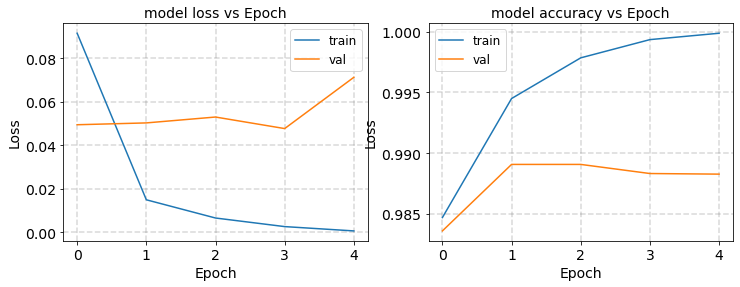

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0881 - accuracy: 0.9837 - val_loss: 0.0331 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0456 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0580 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 4.0203e-04 - accuracy: 0.9999 - val_loss: 0.0755 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.7982e-05 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9898


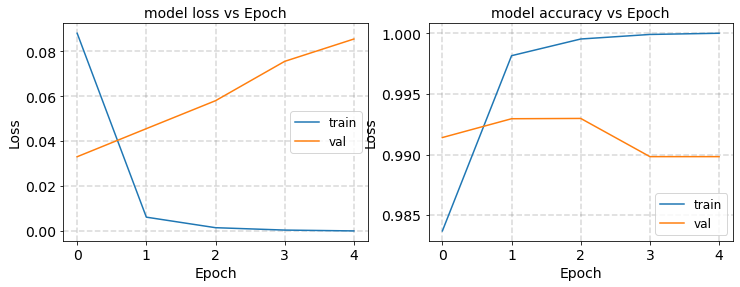

round2 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0795 - accuracy: 0.9884 - val_loss: 0.0429 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0500 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0625 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 9.1363e-04 - accuracy: 0.9999 - val_loss: 0.0679 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0521 - val_accuracy: 0.9937


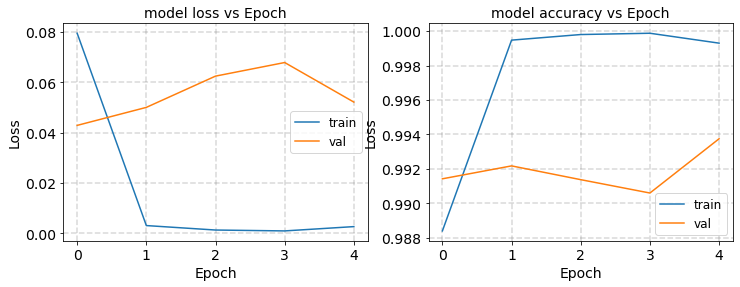

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0967 - accuracy: 0.9856 - val_loss: 0.0519 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0794 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.2854e-04 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 5.5403e-05 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.9524e-05 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9882


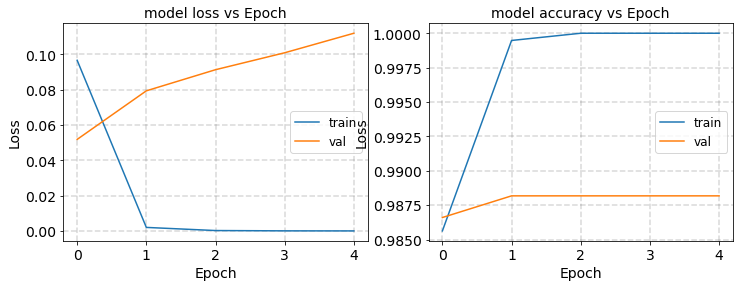

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0954 - accuracy: 0.9854 - val_loss: 0.0591 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0819 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 1.8062e-04 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 5.3016e-05 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 2.0125e-05 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9875


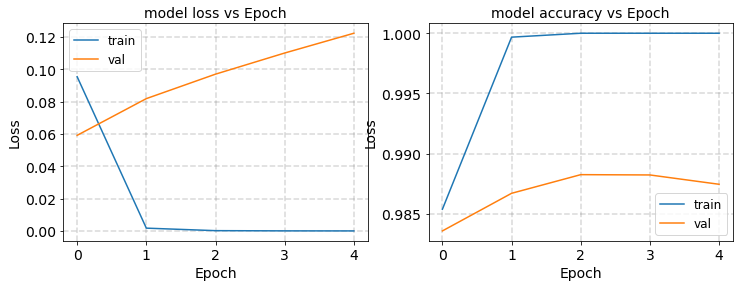

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0894 - accuracy: 0.9857 - val_loss: 0.0551 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0618 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0765 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0743 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0716 - val_accuracy: 0.9898


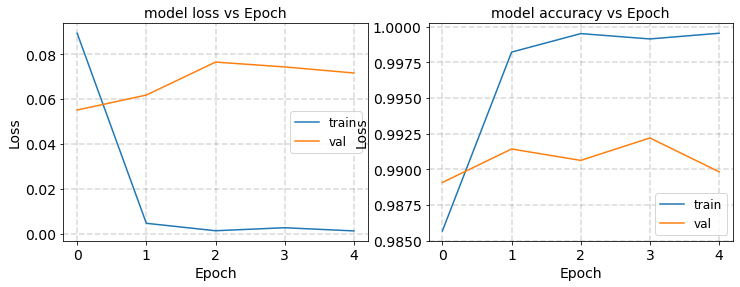

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 64)                8258      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_04_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=0.4,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_04_4_64_run0  1.80051         1.83086      0.0103352   
2467_seq_prune_04_4_64_run1  1.68747         1.72114      0.0173747   
2467_seq_prune_04_4_64_run2   1.7786         1.81011      0.0218542   
2467_seq_prune_04_4_64_run3  1.72653         1.74614      0.0296466   
2467_seq_prune_04_4_64_run4  1.81087         1.84243      0.0215388   
2467_seq_prune_04_4_64_run5  1.78014         1.79831      0.0227643   
2467_seq_prune_04_4_64_run6  1.79176         1.84261      0.0184482   
2467_seq_prune_04_4_64_run7  1.87649         1.83989      0.0187935   
2467_seq_prune_04_4_64_run8  1.70912         1.73632      0.0136677   
2467_seq_prune_04_4_64_run9  1.70635         1.74085      0.0215864   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_04_4_64_run0     0.00231102          0       0          Yes   
2467_seq_prune_04_4_64_run1      0.0038851          5     0.1           No   
2467_seq_prune_04_4_64_run2     0.00488676          5     0.1           No   
2467_seq_prune_04_4_64_run3     0.00662917         20     0.4           No   
2467_seq_prune_04_4_64_run4     0.00481621         15     0.3           No   
2467_seq_prune_04_4_64_run5     0.00509026         25     0.5           No   
2467_seq_prune_04_4_64_run6     0.00412515          0       0          Yes   
2467_seq_prune_04_4_64_run7     0.00420235        100       0          Yes   
2467_seq_prune_04_4_64_run8     0.00305619          0       0          Yes   
2467_seq_prune_04_4_64_run9     0.00482686          5     0.1           No   

                            Direction  Accuracy  
2467_seq_prune_04_4_64_run0   smaller   0.96235  
2467_seq_prune_04_4_64_run1   smaller   0.95925  
2467_seq_prune_04_4_64_run2   smaller    0.9414  
2467_seq_prune_04_4_64_run3   smaller     0.964  
2467_seq_prune_04_4_64_run4   smaller  0.965425  
2467_seq_prune_04_4_64_run5   smaller  0.946725  
2467_seq_prune_04_4_64_run6   smaller  0.965425  
2467_seq_prune_04_4_64_run7    larger   0.95525  
2467_seq_prune_04_4_64_run8   smaller    0.9702  
2467_seq_prune_04_4_64_run9   smaller    0.9544

#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_04_4_64_run0  1.80051         1.83086      0.0103352   
2467_seq_prune_04_4_64_run1  1.68747         1.72114      0.0173747   
2467_seq_prune_04_4_64_run2   1.7786         1.81011      0.0218542   
2467_seq_prune_04_4_64_run3  1.72653         1.74614      0.0296466   
2467_seq_prune_04_4_64_run4  1.81087         1.84243      0.0215388   
2467_seq_prune_04_4_64_run5  1.78014         1.79831      0.0227643   
2467_seq_prune_04_4_64_run6  1.79176         1.84261      0.0184482   
2467_seq_prune_04_4_64_run7  1.87649         1.83989      0.0187935   
2467_seq_prune_04_4_64_run8  1.70912         1.73632      0.0136677   
2467_seq_prune_04_4_64_run9  1.70635         1.74085      0.0215864   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_04_4_64_run0     0.00231102          0       0          Yes   
2467_seq_prune_04_4_64_run1      0.0038851          5     0.1           No   
2467_seq_prune_04_4_64_run2     0.00488676          5     0.1           No   
2467_seq_prune_04_4_64_run3     0.00662917         20     0.4           No   
2467_seq_prune_04_4_64_run4     0.00481621         15     0.3           No   
2467_seq_prune_04_4_64_run5     0.00509026         25     0.5           No   
2467_seq_prune_04_4_64_run6     0.00412515          0       0          Yes   
2467_seq_prune_04_4_64_run7     0.00420235        100       0          Yes   
2467_seq_prune_04_4_64_run8     0.00305619          0       0          Yes   
2467_seq_prune_04_4_64_run9     0.00482686          5     0.1           No   

                            Direction  Accuracy  
2467_seq_prune_04_4_64_run0   smaller   0.96235  
2467_seq_prune_04_4_64_run1   smaller   0.95925  
2467_seq_prune_04_4_64_run2   smaller    0.9414  
2467_seq_prune_04_4_64_run3   smaller     0.964  
2467_seq_prune_04_4_64_run4   smaller  0.965425  
2467_seq_prune_04_4_64_run5   smaller  0.946725  
2467_seq_prune_04_4_64_run6   smaller  0.965425  
2467_seq_prune_04_4_64_run7    larger   0.95525  
2467_seq_prune_04_4_64_run8   smaller    0.9702  
2467_seq_prune_04_4_64_run9   smaller    0.9544

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.06935565, -0.        ,  0.        , ..., -0.        ,
         0.08193439, -0.07218833],
       [-0.06829116,  0.        , -0.        , ...,  0.03915025,
        -0.        ,  0.0577771 ],
       [-0.06057266, -0.06648441, -0.        , ...,  0.07819136,
        -0.        ,  0.        ],
       ...,
       [-0.        , -0.        ,  0.05066127, ..., -0.07892593,
        -0.03620382,  0.05680736],
       [-0.        , -0.06856415,  0.0758753 , ...,  0.04044484,
         0.03812491, -0.        ],
       [-0.        , -0.        , -0.03444327, ..., -0.        ,
        -0.05541086, -0.04639741]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.800512145588944
1.8308649964512593
0.010335177372459677
0.00231101591643375
0.0
0.0
Yes
smaller
0.9623500108718872
